# Libraries

In [1]:
import volpick.data
import volpick

from obspy.clients.fdsn import Client
from obspy import read,UTCDateTime
import matplotlib.pyplot as plt
import os
from scipy.fft import fft, fftfreq
from scipy import signal
import pandas as pd
import numpy as np
import time
import datetime
from pathlib import Path
from obspy.clients.fdsn import Client
from obspy import read, Stream
from obspy.geodetics import gps2dist_azimuth
import seisbench.models as sbm
import seisbench.generate as sbg
import seisbench.data as sbd

from collections import namedtuple
from volpick.data.utils import freqency_index,extract_events
volpick.cache_root=Path("/home/zhongyiyuan/DATA/my_data")

# Explore the original catalog and the data format

In [2]:
id_list=[]
type_list=[]
mag_types=[]

tmp_list1=[]
tmp_list2=[]
tmp_list3=[]
with open("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/events_1986to2011.txt", "r") as f:
    f.readline()
    f.readline()
    for line in f:
        mag_types.append(line[124:127].strip())
        id_list.append(line[131:140].strip())
        type_list.append(line[151:154].strip())
        try:
            tmp_list1.append(line[131])
        except Exception:
            print(line)
            raise Exception
        tmp_list2.append(line[151])
        tmp_list3.append(line[117])

In [6]:
print(set(mag_types))
print(sum(np.array(mag_types)=="h"))
print(sum(np.array(mag_types)=="d"))
print(sum(np.array(mag_types)=="Unk"))
print(sum(np.array(mag_types)=="c"))
print(sum(np.array(mag_types)=="l"))

{'c', 'Unk', 'd', 'h', 'l'}
76
13130
2709
238
65249


In [ ]:
print(set(type_list))
print(sum(np.array(type_list)=="re"))
print(sum(np.array(type_list)=="le"))
print(sum(np.array(type_list)=="lp"))

In [ ]:
np.all(np.isin(np.array(type_list),["le","lp"]))

In [ ]:
mag_types.index("U")

In [ ]:
mag_types.index("c")

In [ ]:
mag_types.index("h")

In [ ]:
np.all(np.isin(np.array(mag_types),["l","d"]) )

In [ ]:
np.all(np.array(tmp_list1)==" ")

In [ ]:
np.all(np.array(tmp_list2)==" ")

In [ ]:
np.all(np.array(tmp_list3)==" ")

In [ ]:
hawaii = volpick.data.HawaiiDataset1986to2011()

In [ ]:
df=hawaii.read(format="csv")
#df=pd.read_csv("/home/zhongyiyuan/volpick/test/test_read_hawaii/hawaii_catalog.csv")

In [ ]:
labels=list(df.columns)
print(labels)
drop_labels=[x for x in labels if "source" not in x]
print(drop_labels)
event_table=df.drop_duplicates(subset="source_id",keep="first",ignore_index=True).copy()
event_table.drop(labels=drop_labels, axis=1)

In [ ]:
len(event_table)

In [ ]:
len(df)

In [ ]:
(df[(pd.notna(df["trace_s_arrival_time"]))& (pd.notna(df["trace_p_arrival_time"]))][["trace_s_arrival_time","trace_p_arrival_time"]])

In [ ]:
df=pd.read_csv("/home/zhongyiyuan/DATA/my_data/hawaii/hawaii_catalog.csv")

In [ ]:
df=pd.read_csv("/home/zhongyiyuan/DATA/my_data/hawaii/hawaii_catalog.csv")

In [ ]:
len(df)

In [ ]:
len(df[(pd.notna(df["trace_s_arrival_time"]))& (pd.notna(df["trace_p_arrival_time"]))][["trace_s_arrival_time","trace_p_arrival_time"]])

# Whole catalog

In [122]:
hawaii = volpick.data.HawaiiDataset()
whole_catalog=hawaii.read(format="csv")
print(f"The whole catalog includes {len(whole_catalog)} waveforms, where there are")
print(f""" {len(whole_catalog[whole_catalog["source_type"]!="lp"])} waveforms for regular earthquakes""")
print(f""" {len(whole_catalog[whole_catalog["source_type"]=="lp"])} waveforms for long-period earthquakes""")

The default saving directory is used: /home/zhongyiyuan/DATA/my_data/hawaii1986to2011
/home/zhongyiyuan/DATA/my_data/hawaii1986to2011 exists
The whole catalog includes 2151763 waveforms, where there are
 1850504 waveforms for regular earthquakes
 301259 waveforms for long-period earthquakes


In [123]:
hawaii._save_csv_path

PosixPath('/home/zhongyiyuan/DATA/my_data/hawaii1986to2011/hawaii_catalog1986_2011.csv')

In [125]:
whole_catalog

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,station_location_code,trace_channel,trace_p_arrival_time,trace_s_arrival_time,trace_p_max_weight,trace_s_max_weight,trace_p_first_motion
0,hawaii19852031,1986-01-01T00:00:46.080000Z,19.423500,-155.328333,2.19,1.84,ml,le,HV,AHU,--,EH,1986-01-01T00:00:48.330000Z,1986-01-01T00:00:50.180000Z,1.22,0.61,D
1,hawaii19852031,1986-01-01T00:00:46.080000Z,19.423500,-155.328333,2.19,1.84,ml,le,HV,AHU,--,EL,1986-01-01T00:00:48.330000Z,1986-01-01T00:00:50.180000Z,1.22,0.61,D
2,hawaii19852031,1986-01-01T00:00:46.080000Z,19.423500,-155.328333,2.19,1.84,ml,le,HV,AIN,--,EH,1986-01-01T00:00:49.560000Z,1986-01-01T00:00:52.490000Z,1.22,0.01,U
3,hawaii19852031,1986-01-01T00:00:46.080000Z,19.423500,-155.328333,2.19,1.84,ml,le,HV,AIN,--,EL,1986-01-01T00:00:49.560000Z,1986-01-01T00:00:52.490000Z,1.22,0.01,U
4,hawaii19852031,1986-01-01T00:00:46.080000Z,19.423500,-155.328333,2.19,1.84,ml,le,HV,DES,--,EH,1986-01-01T00:00:48.600000Z,1986-01-01T00:00:50.360000Z,1.22,0.61,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151758,hawaii60294881,2011-12-31T18:27:51.370000Z,19.225167,-155.495333,8.48,1.45,md,le,HV,RCOD,--,EH,2011-12-31T18:27:55.400000Z,NaN,0.15,NaN,NaN
2151759,hawaii60294881,2011-12-31T18:27:51.370000Z,19.225167,-155.495333,8.48,1.45,md,le,HV,WAID,--,EH,2011-12-31T18:28:02.780000Z,NaN,0.47,NaN,NaN
2151760,hawaii60294881,2011-12-31T18:27:51.370000Z,19.225167,-155.495333,8.48,1.45,md,le,HV,WOO,--,EH,2011-12-31T18:27:53.220000Z,NaN,1.86,NaN,D
2151761,hawaii60294881,2011-12-31T18:27:51.370000Z,19.225167,-155.495333,8.48,1.45,md,le,HV,WOOD,--,EH,2011-12-31T18:27:53.180000Z,NaN,1.86,NaN,D


In [7]:
metadata2009to2011 = whole_catalog[
    (whole_catalog["source_origin_time"] > "2009-03-31T23:59:59.000000Z")
    & (pd.notna(whole_catalog["trace_s_arrival_time"]))
    & (pd.notna(whole_catalog["trace_p_arrival_time"]))
].copy()
metadata2009to2011_vt=metadata2009to2011[metadata2009to2011["source_type"]!="lp"].iloc[:1997].copy()
len(metadata2009to2011_vt)

In [3]:
not_in_sac_files=whole_catalog[(whole_catalog["source_origin_time"]>"2009-03-31T23:59:59.000000Z")&pd.notna(whole_catalog["trace_p_arrival_time"])&pd.notna(whole_catalog["trace_s_arrival_time"])&pd.notna(whole_catalog["trace_p_max_weight"])&pd.notna(whole_catalog["trace_s_max_weight"])]
print(len(not_in_sac_files))

In [124]:
len_both_P_and_S=len(whole_catalog[pd.notna(whole_catalog["trace_p_arrival_time"])&pd.notna(whole_catalog["trace_s_arrival_time"])&pd.notna(whole_catalog["trace_p_max_weight"])&pd.notna(whole_catalog["trace_s_max_weight"])])
len_both_P_and_S_rg=len(whole_catalog[pd.notna(whole_catalog["trace_p_arrival_time"])&pd.notna(whole_catalog["trace_s_arrival_time"])&pd.notna(whole_catalog["trace_p_max_weight"])&pd.notna(whole_catalog["trace_s_max_weight"])&(whole_catalog["source_type"]!="lp")])
len_both_P_and_S_lp=len(whole_catalog[pd.notna(whole_catalog["trace_p_arrival_time"])&pd.notna(whole_catalog["trace_s_arrival_time"])&pd.notna(whole_catalog["trace_p_max_weight"])&pd.notna(whole_catalog["trace_s_max_weight"])&(whole_catalog["source_type"]=="lp")])
print(f"{len_both_P_and_S} waveforms have both P and S arrivals with nonzero weights")
print(f"including {len_both_P_and_S_rg} regular earthquake waveforms")
print(f"and {len_both_P_and_S_lp} long-period earthquake waveforms")

623880 waveforms have both P and S arrivals with nonzero weights
including 533924 regular earthquake waveforms
and 89956 long-period earthquake waveforms


In [1099]:
whole_catalog.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)

In [9]:
len(whole_catalog)

2151763

In [907]:
np.unique(whole_catalog["trace_channel"])

array(['BH', 'BN', 'EH', 'EL', 'HH', 'HN'], dtype=object)

In [ ]:
same_station_catalog=whole_catalog[whole_catalog.duplicated(subset=["source_id","station_network_code","station_code"],keep=False)]
# same_station_catalog.to_csv("same_station_hawaii.csv",index=False)

In [9]:
print(len(whole_catalog[(pd.notna(whole_catalog["trace_s_arrival_time"]))& (pd.notna(whole_catalog["trace_p_arrival_time"])) & (whole_catalog["source_type"]=="lp")]))
#权重大于0的
print(len(whole_catalog[(pd.notna(whole_catalog["trace_s_arrival_time"]))
                  & (pd.notna(whole_catalog["trace_p_arrival_time"])) 
                  & (whole_catalog["source_type"]=="lp") 
                  & (whole_catalog["trace_p_max_weight"]>0)
                  & (whole_catalog["trace_s_max_weight"]>0)
                  ]))

89956
89956


In [ ]:
len(same_station_catalog[same_station_catalog["source_type"]=="lp"])

In [ ]:
len(same_station_catalog[(same_station_catalog["source_type"]=="lp")&(pd.notna(same_station_catalog["trace_s_arrival_time"]))& (pd.notna(same_station_catalog["trace_p_arrival_time"]))])

In [10]:
both_PS_catalog=whole_catalog[(pd.notna(whole_catalog["trace_s_arrival_time"]))& (pd.notna(whole_catalog["trace_p_arrival_time"]))]
lp_both_PS_catalog=both_PS_catalog[both_PS_catalog["source_type"]=="lp"]

In [11]:
print(len(both_PS_catalog))
print(len(lp_both_PS_catalog))

623880
89956


In [ ]:
len(lp_both_PS_catalog.drop_duplicates(subset=["source_id","station_network_code","station_code","station_location_code"]))

In [ ]:
print(len(both_PS_catalog))
print(len(lp_both_PS_catalog))

In [ ]:
cat_no_duplicate=whole_catalog.drop_duplicates(subset=["source_id","station_network_code","station_code","station_location_code"],keep="first",inplace=False)

In [ ]:
len_dup=[]
for source_id,station_network_code,station_code,station_location_code in zip(cat_no_duplicate["source_id"],cat_no_duplicate["station_network_code"],cat_no_duplicate["station_code"],cat_no_duplicate["station_location_code"]):
    sub_cat=whole_catalog[(whole_catalog["source_id"]==source_id)
                          &(whole_catalog["station_network_code"]==station_network_code)
                          &(whole_catalog["station_code"]==station_code)
                          &(whole_catalog["station_location_code"]==station_location_code)]
    len_dup.append(len(sub_cat))

# Converted waveforms 1986 to 2009

In [251]:
convert_table=pd.read_csv(hawaii.save_dir/"sac2mseed_log"/"convert.csv")
print(f"{len(convert_table)} seismograms have been downloaded sucessfully.")
print(f""" {len(convert_table[convert_table["source_type"]!="lp"])} waveforms of regular earthquakes""")
print(f""" {len(convert_table[convert_table["source_type"]=="lp"])} waveforms of long-period earthquakes""")

182719 seismograms have been downloaded sucessfully.
 140093 waveforms of regular earthquakes
 42626 waveforms of long-period earthquakes


In [5]:
lp_data=convert_table[convert_table["source_type"]=="lp"]
rg_data=convert_table[convert_table["source_type"]!="lp"]

In [6]:
print("For all the downloaded data:")
print(f"Minimum date: {min(convert_table['source_origin_time'])}")
print(f"Maximum date: {max(convert_table['source_origin_time'])}")

print()
print("For the downloaded lp waveforms:")
print(f"Minimum date: {min(lp_data['source_origin_time'])}")
print(f"Maximum date: {max(lp_data['source_origin_time'])}")
print()
print("For the downloaded regular earthquakes waveforms:")
print(f"Minimum date: {min(rg_data['source_origin_time'])}")
print(f"Maximum date: {max(rg_data['source_origin_time'])}")

For all the downloaded data:
Minimum date: 1986-01-01T12:45:11.250000Z
Maximum date: 2009-03-31T19:42:34.430000Z

For the downloaded lp waveforms:
Minimum date: 1986-01-04T06:57:24.390000Z
Maximum date: 2009-03-31T19:42:34.430000Z

For the downloaded regular earthquakes waveforms:
Minimum date: 1986-01-01T12:45:11.250000Z
Maximum date: 2009-03-31T14:41:10.220000Z


In [8]:
event_table=extract_events(convert_table)
event_table

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type
0,hawaii206216,1986-01-01T12:45:11.250000Z,19.426167,-155.317667,4.99,1.11,ml,le
1,hawaii206218,1986-01-01T12:55:31.220000Z,19.426333,-155.331167,1.14,0.97,ml,le
2,hawaii206219,1986-01-01T15:12:05.470000Z,19.427167,-155.325000,6.10,1.47,ml,le
3,hawaii206226,1986-01-02T02:41:59.920000Z,19.401833,-155.631000,-3.63,1.96,ml,le
4,hawaii206231,1986-01-02T04:46:22.120000Z,19.396000,-155.256667,1.44,1.30,ml,le
...,...,...,...,...,...,...,...,...
63447,hawaii5702742,2009-03-31T09:56:00.060000Z,19.399667,-155.282667,0.84,1.76,ml,lp
63448,hawaii5702755,2009-03-31T12:59:17.800000Z,19.683500,-155.953667,12.10,2.25,ml,le
63449,hawaii5702762,2009-03-31T14:41:10.220000Z,19.197333,-155.482167,35.70,1.88,ml,le
63450,hawaii5702821,2009-03-31T19:41:25.400000Z,19.421667,-155.268833,3.50,1.48,ml,lp


In [9]:
print(f"""{len(event_table[event_table["source_type"]=="lp"])} LP events""")
print(f"""{len(event_table[event_table["source_type"]!="lp"])} regular earthquake events""")

14929 LP events
48523 regular earthquake events


# Abnormal traces

In [261]:
download1=pd.read_csv(hawaii.save_dir/"old_sac2mseed_log"/"convert.csv")
download1=download1[download1["source_type"]=="lp"]
download2=pd.read_csv(hawaii.save_dir/"sac2mseed_log"/"convert.csv")
download2=download2[download2["source_type"]=="lp"]
print(len(download1))
print(len(download2))

42626
42626


In [263]:
abnormal_traces=pd.read_csv(hawaii.save_dir/"sac2mseed_log"/"abnormal_traces.csv")
abnormal_traces=abnormal_traces[abnormal_traces["source_type"]=="lp"]

6036


In [129]:
np.unique(abnormal_traces["remark"])

array(['No_folder', 'No_waveforms', 'P<origin', 'P>S', 'length<5s',
       'phases_in_gap'], dtype=object)

In [257]:
phases_in_gap=abnormal_traces[abnormal_traces["remark"]=="phases_in_gap"]
print(f"There are {len(phases_in_gap)} waveforms for which phase picks are located in the data gap")
window_too_short=abnormal_traces[abnormal_traces["remark"]=="length<5s"]
print(f"{len(window_too_short)} waveforms whose lengths are less than 5s")
p_lt_org=abnormal_traces[abnormal_traces["remark"]=="P<origin"]
s_lt_org=abnormal_traces[abnormal_traces["remark"]=="S<origin"]
print(len(p_lt_org))
print(len(s_lt_org))
print(f"{len(p_lt_org)+len(s_lt_org)} waveforms for which the manual picks are before the origin time")

p_lt_S=abnormal_traces[abnormal_traces["remark"]=="P>S"]
print(f"{len(p_lt_S)} waveforms for which manually picked S arrivals are before P arrivals")


no_waveforms=abnormal_traces[abnormal_traces["remark"]=="No_waveforms"]
print(f"No waveforms: {len(no_waveforms)}")

no_folder=abnormal_traces[abnormal_traces["remark"]=="No_folder"]
print(f"No folders: {len(no_folder)}")


There are 7 waveforms for which phase picks are located in the data gap
2 waveforms whose lengths are less than 5s
88
0
88 waveforms for which the manual picks are before the origin time
5 waveforms for which manually picked S arrivals are before P arrivals
No waveforms: 2871
No folders: 3067


# V and Z channels

In [130]:
data_with_vz=pd.read_csv("/mnt/DATA2/YiyuanZhong/my_data/hawaii1986to2011/check_VZ_channels/log/VZ.csv")

In [134]:
data_with_vz_lp=data_with_vz[data_with_vz["source_type"]=="lp"].copy()
data_with_vz_vt=data_with_vz[data_with_vz["source_type"]!="lp"].copy()

In [241]:
data_with_vz_lp.to_csv("/mnt/DATA2/YiyuanZhong/my_data/hawaii1986to2011/check_VZ_channels/log/VZ_lp.csv",index=False)
data_with_vz_vt.to_csv("/mnt/DATA2/YiyuanZhong/my_data/hawaii1986to2011/check_VZ_channels/log/VZ_lp.csv",index=False)

In [250]:
idx=data_with_vz_lp.drop_duplicates(
        subset="source_id", keep="first", ignore_index=True, inplace=False
    )["source_id"]
rand_events_idxs = np.sort(
    np.random.default_rng(seed=50).choice(
        idx, size=10, replace=False
    )
)
rand_events_idxs

array(['hawaii1284390', 'hawaii1284678', 'hawaii5321757', 'hawaii5352653',
       'hawaii5393360', 'hawaii5394980', 'hawaii5409372', 'hawaii5629858',
       'hawaii6000236', 'hawaii6000238'], dtype=object)

array(['hawaii1284390', 'hawaii1284678', 'hawaii5321757', 'hawaii5352653',
       'hawaii5393360', 'hawaii5394980', 'hawaii5409372', 'hawaii5629858',
       'hawaii6000236', 'hawaii6000238'], dtype=object)

In [242]:
print(len(data_with_vz_lp))
print(len(data_with_vz_vt))

2471
38587


In [238]:
def _read_sac_info(fname):
    with open(fname, "r") as f:
        line = f.readline()
        info_dict = {}
        while line:
            key, _, value = line.partition(":")
            info_dict[key] = value.strip().split()
            line = f.readline()
    return info_dict

def _read_sac_files(data_dir, t_offset):
    sac_files = list(data_dir.glob("*.sac"))
    info_files = [Path(str(x).replace("sac", "pick")) for x in sac_files]
    sts = Stream()
    for sac, info in zip(sac_files, info_files):
        st = read(sac)
        info_dict = _read_sac_info(info)
        start_t = info_dict["start_time"]
        st[0].stats.starttime = UTCDateTime(
            year=int(start_t[0].strip()),
            month=int(start_t[1].strip()),
            day=int(start_t[2].strip()),
            hour=int(start_t[3].strip()),
            minute=int(start_t[4].strip()),
            second=00,
        ) + float(start_t[5])
        for tr in st:
            tr.stats.starttime = tr.stats.starttime + t_offset
        sts += st
    return sts

def plot_waveforms_sac(
    waveform_table,
    data_dir,
    fig_dir,
    dpi=300,
    savefig=True,
    xrangemin=None,
    xrangemax=None,
    fts=10,
    **kwargs,
):
    data_dir = Path(data_dir)
    fig_dir=Path(fig_dir)
    waveform_table.drop_duplicates(
        subset=["source_id", "station_code"], keep="first", inplace=True
    )           
    print(f"Plotting {len(waveform_table)} figures")
    if not fig_dir.exists():
        fig_dir.mkdir(parents=True, exist_ok=False)
    last_subdir = None
    for i in range(len(waveform_table)):
        metadata = waveform_table.iloc[i]

        sta = metadata["station_code"]
        year = metadata["source_origin_time"].split("T")[0].split("-")[0]
        month = metadata["source_origin_time"].split("T")[0].split("-")[1]
        evid = metadata["source_id"].replace("hawaii", "")
        source_type=metadata["source_type"]

        subdir = data_dir / year / month / f"{evid}.dir"
        if not subdir.exists():
            print(f"{subdir} folder does not exists")
            continue

        if subdir != last_subdir:
            last_subdir = subdir
            sts = _read_sac_files(data_dir=subdir, t_offset=36000)
            sts.detrend("demean").detrend("linear")
            # sts.filter("bandpass", freqmin=1, freqmax=25.0)
            sts.filter("highpass", freq=0.5)

        st = sts.select(station=sta).copy()

        starttime = min(trace.stats.starttime for trace in st)
        st.merge()
        nc = len(st)
        fig, axs = plt.subplots(
            nc, 1, figsize=(6.5, nc * 1.8), sharex="col", squeeze=False
        )
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        phase_colors = {"P": "blue", "S": "red"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[phase]):
                picks.append((UTCDateTime(metadata[phase]), phase_hints[phase]))

        plt.subplots_adjust(hspace=0.1)
        for k in range(nc):
            x_times = st[k].times(reftime=starttime)
            y_data = st[k].data
            axs[k][0].plot(
                st[k].times(reftime=starttime),
                st[k].data,
                label=st[k].id,
                color="black",
                linewidth=0.5,
                **kwargs,
            )  
            if xrangemin is None:
                xmin = min(st[k].times(reftime=starttime)[0] for k in range(nc))
            else:
                xmin = min(picks)[0] + xrangemin - starttime
            if xrangemax is None:
                xmax = max(st[k].times(reftime=starttime)[-1] for k in range(nc))
            else:
                xmax = max(picks)[0] + xrangemax - starttime
            axs[k][0].set_xlim(xmin, xmax)

            ymin = np.min(y_data[(x_times >= xmin) & (x_times <= xmax)])
            ymax = np.max(y_data[(x_times >= xmin) & (x_times <= xmax)])
            ylength = ymax - ymin
            ymin = ymin - ylength * 0.15
            ymax = ymax + ylength * 0.15
            axs[k][0].set_ylim(ymin, ymax)

            for pick, phase_label in picks:
                axs[k][0].vlines(
                    pick - starttime,
                    ymin=ymin,
                    ymax=ymax,
                    color=phase_colors[phase_label],
                    label=phase_label,
                    linewidth=0.5,
                )
            axs[k][0].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))
            axs[k][0].tick_params(labelsize=fts)
        axs[-1][0].set_xlabel(f"Time from {starttime}", fontsize=fts)
        if savefig:
            plt.savefig(
                fig_dir / f"{evid}_{sta}_{source_type}.jpg",
                bbox_inches="tight",
                dpi=dpi,
            )
        plt.close(fig)

def plot_spectrogram_sac(
    waveform_table,
    data_dir,
    fig_dir,
    dpi=300,
    savefig=True,
    xrangemin=None,
    xrangemax=None,
    fts=10,
    **kwargs,
):
    data_dir = Path(data_dir)
    fig_dir=Path(fig_dir)
    waveform_table.drop_duplicates(
        subset=["source_id", "station_code"], keep="first", inplace=True
    )           
    print(f"Plotting {len(waveform_table)} figures")
    if not fig_dir.exists():
        fig_dir.mkdir(parents=True, exist_ok=False)
    last_subdir = None
    for i in range(len(waveform_table)):
        metadata = waveform_table.iloc[i]

        sta = metadata["station_code"]
        year = metadata["source_origin_time"].split("T")[0].split("-")[0]
        month = metadata["source_origin_time"].split("T")[0].split("-")[1]
        evid = metadata["source_id"].replace("hawaii", "")
        source_type=metadata["source_type"]

        subdir = data_dir / year / month / f"{evid}.dir"
        if not subdir.exists():
            print(f"{subdir} folder does not exists")
            continue

        if subdir != last_subdir:
            last_subdir = subdir
            sts = _read_sac_files(data_dir=subdir, t_offset=36000)
            sts.detrend("demean").detrend("linear")
            # sts.filter("bandpass", freqmin=0.5, freqmax=15.0)
            sts.filter("highpass", freq=0.5)

        st = sts.select(station=sta).copy()

        starttime = min(trace.stats.starttime for trace in st)
        st.merge()
        nc = len(st)
        cm = 1 / 2.54
        fig, axs = plt.subplots(
            nc,
            3,
            figsize=(14, nc * 3.0),
            sharex="col",
            squeeze=False,
        )
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        phase_colors = {"P": "blue", "S": "red"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[phase]):
                picks.append((UTCDateTime(metadata[phase]), phase_hints[phase]))

        plt.subplots_adjust(hspace=0.2, wspace=0.2)
        st_cp = st.copy()
        for k, tr in enumerate(st_cp):
            axs[k][0].plot(
                tr.times(reftime=starttime),
                tr.data,
                label=tr.id,
                color="black",
                linewidth=0.5,
                **kwargs,
            )
            ymin, ymax = axs[k][0].get_ylim()


            if xrangemin is None:
                xmin = min(tr.times(reftime=starttime)[0] for tr in st_cp)
            else:
                xmin = min(picks)[0] + xrangemin - starttime
            if xrangemax is None:
                xmax = max(tr.times(reftime=starttime)[-1] for tr in st_cp)
            else:
                xmax = max(picks)[0] + xrangemax - starttime
            axs[k][0].set_xlim(xmin, xmax)
            # axs[k][0].text(
            #     0.97,
            #     0.02,
            #     tr.id,
            #     verticalalignment="bottom",
            #     horizontalalignment="right",
            #     transform=axs[k][0].transAxes,
            #     fontsize=9,
            # )
            axs[k][0].ticklabel_format(
                axis="y", style="scientific", scilimits=(-2, 2), useMathText=True
            )

            # spectrum
            window = signal.hann(tr.stats.npts)
            yf = fft(tr.data * window)
            freqs = fftfreq(tr.stats.npts, tr.stats.delta)[: tr.stats.npts // 2]
            # axs[k][1].axvline(1, color="gray")
            axs[k][1].semilogx(
                freqs[freqs > 0.1],
                np.abs(yf[: tr.stats.npts // 2][freqs > 0.1]),
                color="blue",
                linewidth=0.5,
            )

            axs[k][1].set_xlim([min(freqs[freqs > 0.1]), max(freqs[freqs > 0.1])])
            # axs[k][1].yaxis.tick_right()
            # axs[k][1].ticklabel_format(
            #     axis="y", style="scientific", scilimits=(-2, 2), useMathText=True
            # )
            axs[k][1].yaxis.get_offset_text().set_fontsize(7)

            n_per_segment = 256
            n_overlap = int(0.95 * n_per_segment)

            f, t, Sxx = signal.spectrogram(
                tr.data,
                fs=tr.stats.sampling_rate,
                mode="magnitude",
                nperseg=n_per_segment,
                noverlap=n_overlap,
            )
            pm = axs[k][2].pcolormesh(t, f, Sxx, shading="gouraud", cmap="magma")
            if len(picks) > 0:
                for pick, phase_label in picks:
                    axs[k][0].vlines(
                        pick - starttime,
                        ymin=ymin,
                        ymax=ymax,
                        color=phase_colors[phase_label],
                        label=phase_label,
                    )
                    axs[k][2].axvline(
                        pick - starttime,
                        color=phase_colors[phase_label],
                        label=phase_label,
                    )                    
                axs[k][0].legend(fontsize=fts)

            axs[k][2].set_xlim(xmin, xmax)
            plt.colorbar(pm, ax=axs[k][2])
            axs[k][2].set_yscale("log")
            axs[k][2].set_ylim([0.5, 50])
            # axs[k][2].yaxis.tick_right()
            axs[k][2].set_ylabel("Frequency (Hz)", fontsize=fts, color="white")
            axs[k][2].yaxis.set_label_coords(0.08, 0.5)
            axs[k][2].set_xlabel("Time (s)", fontsize=fts)

            axs[k][0].tick_params(labelsize=fts)
            axs[k][1].tick_params(labelsize=fts)

        axs[0][0].set_title("Time series", fontsize=fts)
        axs[-1][0].set_xlabel(f"Time from {starttime}", fontsize=fts)
        axs[0][1].set_title("Amplitude spectrum", fontsize=fts)
        axs[-1][1].set_xlabel("Frequency (Hz)", fontsize=fts)
        if savefig:
            plt.savefig(
                fig_dir / f"{evid}_{sta}_{source_type}.jpg",
                bbox_inches="tight",
                dpi=dpi,
            )
        plt.close(fig)

In [239]:
np.random.seed(100)
random_idx=np.random.choice(len(data_with_vz_lp),100,replace=False)
# plot_waveforms_sac(
#     data_with_vz_lp.iloc[random_idx].copy(),
#     data_dir="/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms",
#     fig_dir="/mnt/DATA2/YiyuanZhong/my_data/hawaii1986to2011/check_VZ_channels/fig_lp",
#     dpi=300,
#     savefig=True,
#     xrangemin=None,
#     xrangemax=None,
#     fts=10,
# )
plot_spectrogram_sac(
    data_with_vz_lp.iloc[random_idx].copy(),
    data_dir="/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms",
    fig_dir="/mnt/DATA2/YiyuanZhong/my_data/hawaii1986to2011/check_VZ_channels/fig_spe_lp",
    dpi=300,
    savefig=True,
    xrangemin=-5,
    xrangemax=15,
    fts=10,
)

Plotting 100 figures


In [240]:
np.random.seed(100)
random_idx=np.random.choice(len(data_with_vz_vt),100,replace=False)
# plot_waveforms_sac(
#     data_with_vz_lp.iloc[random_idx].copy(),
#     data_dir="/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms",
#     fig_dir="/mnt/DATA2/YiyuanZhong/my_data/hawaii1986to2011/check_VZ_channels/fig_lp",
#     dpi=300,
#     savefig=True,
#     xrangemin=None,
#     xrangemax=None,
#     fts=10,
# )
plot_spectrogram_sac(
    data_with_vz_vt.iloc[random_idx].copy(),
    data_dir="/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms",
    fig_dir="/mnt/DATA2/YiyuanZhong/my_data/hawaii1986to2011/check_VZ_channels/fig_spe_vt",
    dpi=300,
    savefig=True,
    xrangemin=-5,
    xrangemax=15,
    fts=10,
)

Plotting 100 figures


# Seisbench dataset

In [27]:
data_path=Path("/home/zhongyiyuan/DATA/my_datasets_seisbench/hawaii1986to2009")

dataset=sbd.WaveformDataset(
        data_path,
        sampling_rate=100,
        component_order="ZNE",
        dimension_order="NCW",
        cache="full",
    )

In [32]:
len(dataset)

85252

In [33]:
lengths=[dataset.get_waveforms(i).shape[-1] for i in range(len(dataset))]

In [36]:
print(f"Minimum length: {np.min(lengths)/100}s. Maximum length: {np.max(lengths)/100}s")

Minimum length: 15.0s. Maximum length: 682.06s


In [101]:
np.argmax(np.array(lengths)/100)

34542

In [116]:
np.flatnonzero(np.array(lengths)/100>130)

array([ 4286,  4287,  4288, ..., 85232, 85233, 85234])

In [117]:
print(len(np.flatnonzero(np.array(lengths)/100>130)))

2049


In [103]:
st=read(volpick.cache_root/"hawaii1986to2011"/"sac2mseed"/dataset.get_sample(34542)[1]["trace_name_original"])
st

3 Trace(s) in Stream:
.MLO..EHZ | 2004-09-14T16:12:33.980000Z - 2004-09-14T16:23:56.030000Z | 100.0 Hz, 68206 samples
.MLO..EHN | 2004-09-14T16:12:33.980000Z - 2004-09-14T16:23:56.030000Z | 100.0 Hz, 68206 samples
.MLO..EHE | 2004-09-14T16:12:33.980000Z - 2004-09-14T16:23:56.030000Z | 100.0 Hz, 68206 samples

In [106]:
arr_times=[]
for arr_time in [dataset.get_sample(34542)[1]["trace_p_arrival_time"], dataset.get_sample(34542)[1]["trace_s_arrival_time"]]:
    if pd.notna(arr_time):
        arr_times.append(UTCDateTime(arr_time))

In [107]:
arr_times

[2004-09-14T16:22:28.710000Z, 2004-09-14T16:22:34.220000Z]

In [108]:
min_starttime = min(trace.stats.starttime for trace in st)
max_endtime = max(trace.stats.endtime for trace in st)
print(min_starttime,max_endtime)

2004-09-14T16:12:33.980000Z 2004-09-14T16:23:56.030000Z


In [109]:
starttime=max(arr_times[0]-65,min_starttime)
endtime=min(arr_times[-1]+65,max_endtime)


In [110]:
st.trim(starttime=starttime, endtime=endtime)

3 Trace(s) in Stream:
.MLO..EHZ | 2004-09-14T16:21:23.710000Z - 2004-09-14T16:23:39.220000Z | 100.0 Hz, 13552 samples
.MLO..EHN | 2004-09-14T16:21:23.710000Z - 2004-09-14T16:23:39.220000Z | 100.0 Hz, 13552 samples
.MLO..EHE | 2004-09-14T16:21:23.710000Z - 2004-09-14T16:23:39.220000Z | 100.0 Hz, 13552 samples

In [115]:
st

3 Trace(s) in Stream:
.MLO..EHZ | 2004-09-14T16:21:23.710000Z - 2004-09-14T16:23:39.220000Z | 100.0 Hz, 13552 samples
.MLO..EHN | 2004-09-14T16:21:23.710000Z - 2004-09-14T16:23:39.220000Z | 100.0 Hz, 13552 samples
.MLO..EHE | 2004-09-14T16:21:23.710000Z - 2004-09-14T16:23:39.220000Z | 100.0 Hz, 13552 samples

In [63]:
UTCDateTime(dataset.get_sample(4286)[1]["trace_p_arrival_time"])

1989-07-27T03:03:55.810000Z

(array([5.3883e+04, 3.0311e+04, 7.7900e+02, 1.5000e+02, 5.8000e+01,
        1.2000e+01, 2.8000e+01, 1.1000e+01, 1.0000e+01, 1.0000e+01]),
 array([ 15.   ,  81.706, 148.412, 215.118, 281.824, 348.53 , 415.236,
        481.942, 548.648, 615.354, 682.06 ]),
 <BarContainer object of 10 artists>)

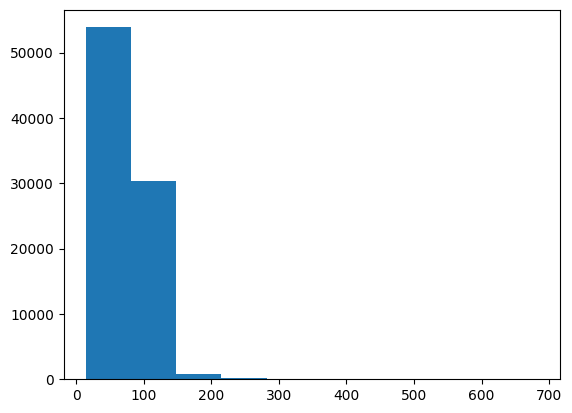

In [38]:
plt.hist(np.array(lengths)/100)

In [4]:
np.all(pd.notna(dataset.metadata["trace_p_arrival_sample"]))&np.all(pd.notna(dataset.metadata["trace_s_arrival_sample"]))

True

Unnamed dataset - 85252 traces
229 spikes


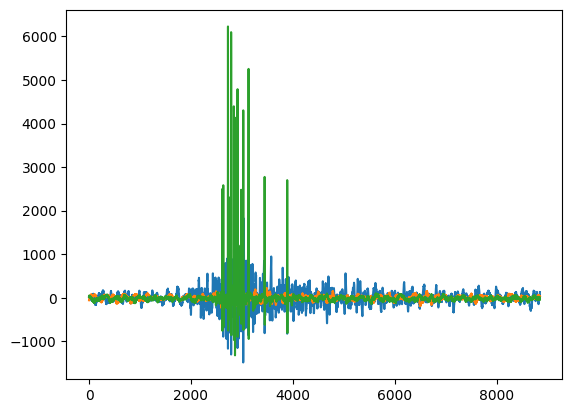

In [5]:
print(dataset)
trace_with_spikes_index=np.flatnonzero(dataset.metadata["trace_has_spikes"].to_numpy())
print(f"{len(trace_with_spikes_index)} spikes")
plt.plot(dataset.get_sample(trace_with_spikes_index[20])[0].T)

In [6]:
dataset.filter(~dataset.metadata["trace_has_spikes"],inplace=True)

In [7]:
freq_indices=dataset.metadata.drop_duplicates(subset="source_id",keep="first",inplace=False)["source_frequency_index"].to_numpy()

lp_metadata=dataset.metadata[dataset.metadata["source_type"]=="lp"]
rg_metadata=dataset.metadata[dataset.metadata["source_type"]!="lp"]
print(len(lp_metadata))
print(len(rg_metadata))

# source id of lp events and frequency indexes of lp events
freq_indices_lp=lp_metadata.drop_duplicates(subset="source_id",keep="first",inplace=False)["source_frequency_index"].to_numpy()
freq_indices_rg=rg_metadata.drop_duplicates(subset="source_id",keep="first",inplace=False)["source_frequency_index"].to_numpy()

42604
42419


In [72]:
# frequency indexes of each trace
trace_freq_indices=dataset.metadata["trace_frequency_index"]
trace_freq_indices_lp=lp_metadata["trace_frequency_index"]
trace_freq_indices_rg=rg_metadata["trace_frequency_index"]
# validate
print(len(trace_freq_indices_rg)+len(trace_freq_indices_lp)==len(trace_freq_indices))
print(np.all(np.sort(np.concatenate((trace_freq_indices_rg, trace_freq_indices_lp)))==np.sort(trace_freq_indices)))
print(np.sum(np.sort(np.concatenate((trace_freq_indices_rg, trace_freq_indices_lp)))-np.sort(trace_freq_indices)))

True
True
0.0


max 2.211020200386624
min -2.2803693342658984


Text(0, 0.5, 'Frequency density')

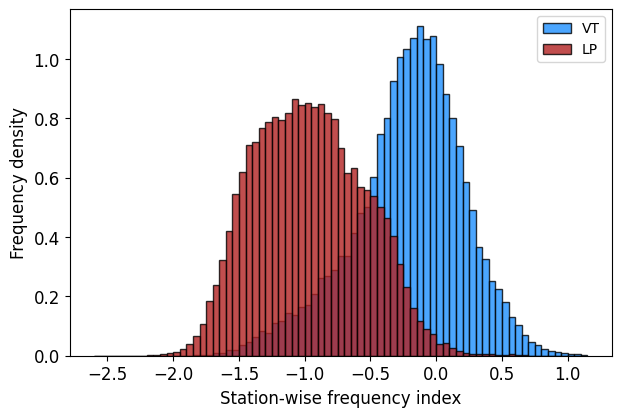

In [73]:
print(f"max {np.max(trace_freq_indices)}")
print(f"min {np.min(trace_freq_indices)}")
fts = 12
fig = plt.figure(figsize=(7, 4.5))

bins = np.arange(-2.6, 1.2, 0.05)
# plt.hist(trace_freq_indices,bins,density=True, stacked=True, color="white", edgecolor="black",label="Total")
plt.hist(trace_freq_indices_rg, bins, density=True,  edgecolor="black", color="dodgerblue", alpha=0.8, label="VT")
plt.hist(trace_freq_indices_lp, bins, density=True,  edgecolor="black", color="firebrick", alpha=0.8, label="LP")
plt.gca().tick_params(labelsize=fts)
plt.legend()
plt.xlabel("Station-wise frequency index", fontsize=fts)
plt.ylabel("Frequency density", fontsize=fts)
# plt.savefig(root_save_path/"FI_by_traces.jpg", bbox_inches="tight", dpi=600)
# plt.savefig(root_save_path/"FI_by_traces.eps", bbox_inches="tight", dpi=600)

max 1.1515357131007906
min -1.980410842477076


Text(0, 0.5, 'Frequency density')

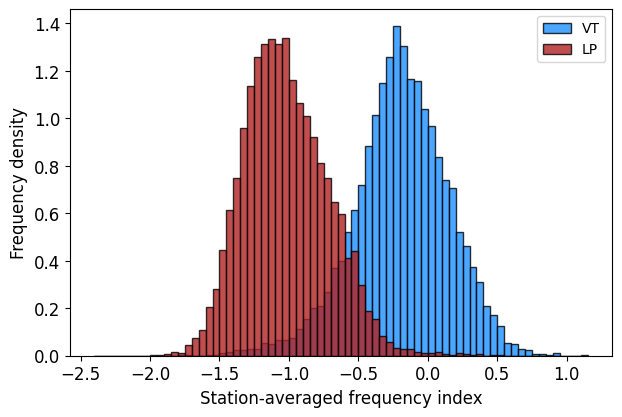

In [75]:
print(f"max {np.max(freq_indices)}")
print(f"min {np.min(freq_indices)}")
fts = 12
fig = plt.figure(figsize=(7, 4.5))

bins = np.arange(-2.4, 1.2, 0.05)
# plt.hist(freq_indices,bins,density=True, color="white", edgecolor="black",label="Total")
plt.hist(freq_indices_rg, bins,density=True, color="dodgerblue", edgecolor="black", alpha=0.8, label="VT")
plt.hist(freq_indices_lp, bins,density=True, color="firebrick", edgecolor="black", alpha=0.8, label="LP")

plt.gca().tick_params(labelsize=fts)
plt.legend()
plt.xlabel("Station-averaged frequency index", fontsize=fts)
plt.ylabel("Frequency density", fontsize=fts)
# plt.savefig(root_save_path/"FI_averaged_over_stations.jpg", bbox_inches="tight", dpi=600)
# plt.savefig(root_save_path/"FI_averaged_over_stations.eps", bbox_inches="tight", dpi=600)

# Downloaded waveforms 2009-2011

In [18]:
download_table=pd.read_csv(hawaii.save_dir/"downloaded_mseed_log"/"downloads.csv")
print(f"{len(download_table)} seismograms have been downloaded sucessfully.")
print(f""" {len(download_table[download_table["source_type"]!="lp"])} waveforms of regular earthquakes""")
print(f""" {len(download_table[download_table["source_type"]=="lp"])} waveforms of long-period earthquakes""")

1828 seismograms have been downloaded sucessfully.
 1783 waveforms of regular earthquakes
 45 waveforms of long-period earthquakes


In [19]:
failed_downloads=pd.read_csv(hawaii.save_dir/"mseed_log"/"failed_downloads.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/home/zhongyiyuan/DATA/my_data/hawaii1986to2011/mseed_log/failed_downloads.csv'

In [20]:
solvable_errors=failed_downloads[~failed_downloads["Error"].isin(["FDSNNoDataException"])]
nodata_errors=failed_downloads[failed_downloads["Error"]=="FDSNNoDataException"]
print(f"{len(solvable_errors)} failed downloads are not due to FDSNNoDataException")
print(f"{len(nodata_errors)} FDSNNoDataException")

1988 failed downloads are not due to FDSNNoDataException
15286 FDSNNoDataException


# Test reading

In [ ]:
# data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1986/01/206231.dir")
data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2007/10/5596053.dir")
sac_files=list(data_dir.glob("*.sac"))

In [ ]:
st0=Stream()
for sac_file in sac_files:
    st0=st0+read(sac_file)
    if st0[-1].stats.station=="NPT":
        print(sac_file)
st0.detrend("demean").detrend("linear")
st0.filter("bandpass", freqmin=3, freqmax=25.0)

In [ ]:
st0.select(station="AHU").plot();

In [ ]:
c_st=st0.select(station="AHU",channel="*V")

In [ ]:
c_st.plot();

In [ ]:
sac_info=st0.select(station="NPT")[0].stats.sac

In [ ]:
{**sac_info}

In [ ]:
dist, azimuth, back_azimuth = gps2dist_azimuth(
                    sac_info["evla"],
                    sac_info["evlo"],
                    sac_info["stla"],
                    sac_info["stlo"],
                )
print(dist, azimuth, back_azimuth)

In [ ]:
st0.select(station="NPT").plot();

In [ ]:
st0.select(station="PAU").plot();

In [ ]:
st_ahu=st0.select(station="AHU")
# st=read("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1986/01/206783.dir/206783.00001.00009.sac")
st_ahu

In [ ]:
st_ain=st0.select(station="AIN")
st_ain

In [ ]:
st_cpk=st0.select(station="CPK")
st_cpk

# Origin time difference

In [3]:
def read_info(fname):
    with open(fname,"r") as f:
        line=f.readline()
        info_dict={}
        while line:
            key,_,value=line.partition(":")
            info_dict[key]=value.strip().split()
            line=f.readline()
    return info_dict

In [11]:
info_dict

{'station code': ['HSS'],
 'channel': ['E'],
 'origin_time': ['3', '0', '17', '7', '44', '59.653786'],
 'start_time': ['2009', '3', '17', '7', '44', '0.669998'],
 'comment': ['*', 'SET:', '1', 'PIN:', '63']}

In [910]:
data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1986/01/206783.dir")
sac_files = list(data_dir.glob("*.sac"))

In [918]:
info_files = [str(x).replace("sac", "pick") for x in sac_files]

206783

In [96]:
# event 206783
hypoinverse_org=UTCDateTime("1986-01-12T11:22:33.940000Z")
data_org=UTCDateTime("1986-01-12T01:22:33.407619")
t_offset=hypoinverse_org-data_org
print(t_offset)
t_offset2=36000

36000.532381


In [97]:
data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1986/01/206783.dir")
sac_files=list(data_dir.glob("*.sac"))
info_files=[str(x).replace("sac","pick") for x in sac_files]
sts=Stream()
for sac,info in zip(sac_files,info_files):
    st=read(sac)
    info_dict=read_info(info)
    start_t=info_dict["start_time"]
    st[0].stats.starttime=UTCDateTime(year=int(start_t[0].strip()),
                                      month=int(start_t[1].strip()),
                                      day=int(start_t[2].strip()),
                                      hour=int(start_t[3].strip()),
                                      minute=int(start_t[4].strip()),
                                      second=00)+float(start_t[5])
    sts+=st
sts.detrend("demean").detrend("linear")
sts.filter("bandpass", freqmin=0.5, freqmax=45.0)

74 Trace(s) in Stream:

.WIL.. | 1986-01-12T01:22:27.760000Z - 1986-01-12T01:23:17.750000Z | 100.0 Hz, 5000 samples
...
(72 other traces)
...
.AIN.. | 1986-01-12T01:22:31.480000Z - 1986-01-12T01:23:17.750000Z | 100.0 Hz, 4628 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [ ]:
stas=["AHU","AIN","DES","STC","HLP","HUL"]
metadata={}
sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii206783") & (whole_catalog["station_code"].isin(stas))].copy()
# metadata.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
# metadata=metadata.iloc[0]
for sta in stas:
    sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii206783") & (whole_catalog["station_code"]==sta)].copy()
    sub_cat.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
    metadata[sta]=sub_cat.iloc[0]

In [921]:
x=sts.select(station=sta)

In [ ]:
st

In [ ]:
st=Stream()
for sta in stas:
    st=st+sts.select(station=sta)
st

In [ ]:
nc = len(st)

fig, axs = plt.subplots(
    nc, 2, figsize=(12, nc * 2.2), sharey="row", squeeze=False
)
plt.subplots_adjust(hspace=0.2,wspace=0.02)

st_c1=st.copy()
for tr in st_c1:
    tr.stats.starttime=tr.stats.starttime+t_offset

st_c2=st.copy()
for tr in st_c2:
    tr.stats.starttime=tr.stats.starttime+t_offset2
for i,st_c in enumerate((st_c1,st_c2)):
    starttime = min(trace.stats.starttime for trace in st_c)
    for k in range(nc):
        sta=st_c[k].stats.station
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[sta][phase]):
                picks.append((UTCDateTime(metadata[sta][phase]), phase_hints[phase]))
             
        axs[k][i].plot(
            st_c[k].times(reftime=hypoinverse_org),
            st_c[k].data,
            label=st_c[k].id,
            color="black",
            linewidth=1,
        )
        ymin, ymax = axs[k][0].get_ylim()
        phase_colors = {"P": "blue", "S": "red"}
        for pick, phase_label in picks:
            axs[k][i].vlines(
                pick - hypoinverse_org,
                ymin=ymin,
                ymax=ymax,
                color=phase_colors[phase_label],
                label=phase_label,
                linewidth=0.5
            )
        if i==1:
            axs[k][i].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))
        xmin = picks[0][0]-hypoinverse_org-1
        xmax = picks[0][0]-hypoinverse_org+3
        axs[k][i].set_xlim(xmin, xmax)
        if k==nc-1:
            axs[nc-1][i].set_xlabel(f"Time after {hypoinverse_org} (s)")
axs[0][0].set_title(f"Shifted with offset={t_offset}s (inferred from files)")
axs[0][1].set_title(f"Shifted with offset={t_offset2}s")
plt.savefig("206783.jpg",dpi=600, bbox_inches="tight")

206231

In [99]:
# event 206231
hypoinverse_org=UTCDateTime("1986-01-02T04:46:22.120000Z")
data_org=UTCDateTime("1986-01-01T18:46:21.463884")

t_offset=hypoinverse_org-data_org
print(t_offset)
t_offset2=36000

data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1986/01/206231.dir")
sac_files=list(data_dir.glob("*.sac"))
info_files=[str(x).replace("sac","pick") for x in sac_files]
sts=Stream()
for sac,info in zip(sac_files,info_files):
    st=read(sac)
    info_dict=read_info(info)
    start_t=info_dict["start_time"]
    st[0].stats.starttime=UTCDateTime(year=int(start_t[0].strip()),
                                      month=int(start_t[1].strip()),
                                      day=int(start_t[2].strip()),
                                      hour=int(start_t[3].strip()),
                                      minute=int(start_t[4].strip()),
                                      second=00)+float(start_t[5])
    sts+=st
sts.detrend("demean").detrend("linear")
sts.filter("bandpass", freqmin=0.5, freqmax=45.0)

36000.656116


74 Trace(s) in Stream:

.SPTN.. | 1986-01-01T18:46:14.779999Z - 1986-01-01T18:46:49.769999Z | 100.0 Hz, 3500 samples
...
(72 other traces)
...
.KFA.. | 1986-01-01T18:46:14.779999Z - 1986-01-01T18:46:49.769999Z | 100.0 Hz, 3500 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [885]:
st_test=read("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1986/01/206231.dir/206231.00001.00009.sac")
st_test[0].stats

         network: 
         station: AHU
        location: 
         channel: 
       starttime: 1986-01-01T18:46:14.779000Z
         endtime: 1986-01-01T18:46:49.769000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 3500
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'depmax': 4888.0, 'b': 0.0, 'e': 35.0, 'stla': 19.373333, 'stlo': -155.265, 'stel': 1070.0, 'evla': 19.409683, 'evlo': -155.23264, 'evdp': -5.7239995, 'dist': 5.2677097, 'az': 220.19862, 'baz': 40.187885, 'gcarc': 0.047373652, 'nzyear': 1986, 'nzjday': 1, 'nzhour': 18, 'nzmin': 46, 'nzsec': 14, 'nzmsec': 779, 'nvhdr': 6, 'norid': 0, 'nevid': 0, 'npts': 3500, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 0, 'lcalda': 1, 'unused23': 0, 'kstnm': 'AHU', 'kcmpnm': '', 'kinst': '', 'kevnm': ''})

In [68]:
stas=["AHU","CPK","NPT","STC","PAU","RIM"]
metadata={}
sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii206231") & (whole_catalog["station_code"].isin(stas))].copy()
# metadata.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
# metadata=metadata.iloc[0]
for sta in stas:
    sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii206231") & (whole_catalog["station_code"]==sta)].copy()
    sub_cat.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
    metadata[sta]=sub_cat.iloc[0]

st=Stream()
for sta in stas:
    st=st+sts.select(station=sta)
st

IndexError: single positional indexer is out-of-bounds

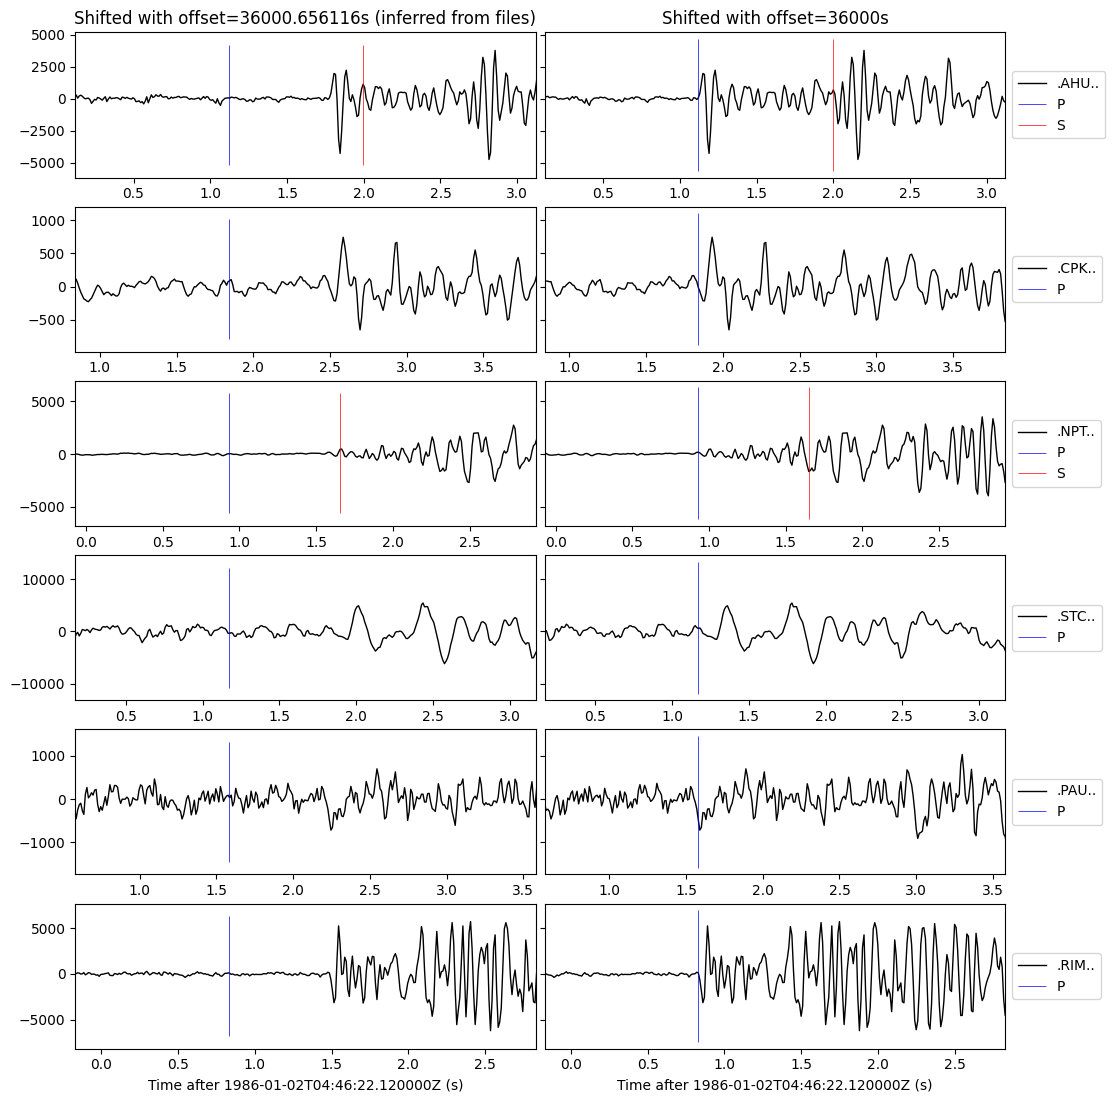

In [888]:
nc = len(st)

fig, axs = plt.subplots(
    nc, 2, figsize=(12, nc * 2.2), sharey="row", squeeze=False
)
plt.subplots_adjust(hspace=0.2,wspace=0.02)

st_c1=st.copy()
for tr in st_c1:
    tr.stats.starttime=tr.stats.starttime+t_offset

st_c2=st.copy()
for tr in st_c2:
    tr.stats.starttime=tr.stats.starttime+t_offset2
for i,st_c in enumerate((st_c1,st_c2)):
    starttime = min(trace.stats.starttime for trace in st_c)
    for k in range(nc):
        sta=st_c[k].stats.station
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[sta][phase]):
                picks.append((UTCDateTime(metadata[sta][phase]), phase_hints[phase]))
             
        axs[k][i].plot(
            st_c[k].times(reftime=hypoinverse_org),
            st_c[k].data,
            label=st_c[k].id,
            color="black",
            linewidth=1,
        )
        ymin, ymax = axs[k][0].get_ylim()
        phase_colors = {"P": "blue", "S": "red"}
        for pick, phase_label in picks:
            axs[k][i].vlines(
                pick - hypoinverse_org,
                ymin=ymin,
                ymax=ymax,
                color=phase_colors[phase_label],
                label=phase_label,
                linewidth=0.5
            )
        if i==1:
            axs[k][i].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))
        xmin = picks[0][0]-hypoinverse_org-1
        xmax = picks[0][0]-hypoinverse_org+2
        axs[k][i].set_xlim(xmin, xmax)
        if k==nc-1:
            axs[nc-1][i].set_xlabel(f"Time after {hypoinverse_org} (s)")
axs[0][0].set_title(f"Shifted with offset={t_offset}s (inferred from files)")
axs[0][1].set_title(f"Shifted with offset={t_offset2}s")
plt.savefig("206231.jpg",dpi=600, bbox_inches="tight")

Event 206778

In [923]:
# event 206778
UTCDateTime("1986-01-12T09:44:22.030000Z")-UTCDateTime("1986-01-11T23:44:21.201641")

36000.828359

Event 1127604

36000.996361
/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1996/09/1127604.dir/1127604.00001.00027.pick
/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1996/09/1127604.dir/1127604.00001.00068.pick
/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1996/09/1127604.dir/1127604.00001.00078.pick
/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1996/09/1127604.dir/1127604.00001.00067.pick


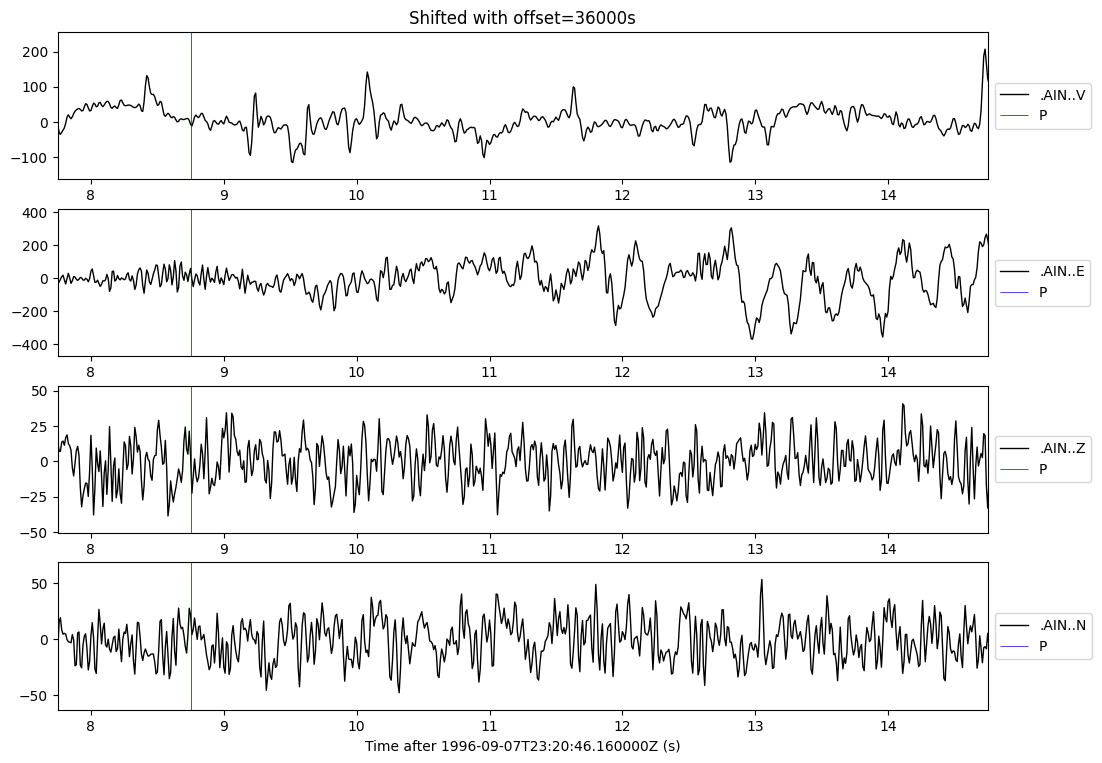

In [127]:
# event 1127604
hypoinverse_org=UTCDateTime("1996-09-07T23:20:46.160000Z")
data_org=UTCDateTime("1996-09-07T13:20:45.163639")

t_offset=hypoinverse_org-data_org
print(t_offset)
t_offset2=36000

data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1996/09/1127604.dir")
sac_files=list(data_dir.glob("*.sac"))

info_files=[str(x).replace("sac","pick") for x in sac_files]
sts=Stream()
for sac,info in zip(sac_files,info_files):
    st=read(sac)
    info_dict=read_info(info)
    start_t=info_dict["start_time"]
    if info_dict["station code"]==["AIN"]:
        print(info)    
    st[0].stats.starttime=UTCDateTime(year=int(start_t[0].strip()),
                                      month=int(start_t[1].strip()),
                                      day=int(start_t[2].strip()),
                                      hour=int(start_t[3].strip()),
                                      minute=int(start_t[4].strip()),
                                      second=00)+float(start_t[5])
    sts+=st
sts.detrend("demean").detrend("linear")
sts.filter("bandpass", freqmin=0.2, freqmax=30.0)
stas=["AHU","MLO","AIN"]
stas=["AIN"]
metadata={}
sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii1127604") & (whole_catalog["station_code"].isin(stas))].copy()
# metadata.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
# metadata=metadata.iloc[0]
for sta in stas:
    sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii1127604") & (whole_catalog["station_code"]==sta)].copy()
    sub_cat.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
    metadata[sta]=sub_cat.iloc[0]

st=Stream()
for sta in stas:
    st=st+sts.select(station=sta)
st

nc = len(st)

fig, axs = plt.subplots(
    nc, 1, figsize=(12, nc * 2.2), sharey="row", squeeze=False
)
plt.subplots_adjust(hspace=0.2,wspace=0.02)

st_c1=st.copy()
for tr in st_c1:
    tr.stats.starttime=tr.stats.starttime+t_offset

st_c2=st.copy()
for tr in st_c2:
    tr.stats.starttime=tr.stats.starttime+t_offset2
for i,st_c in enumerate([st_c2]):
    starttime = min(trace.stats.starttime for trace in st_c)
    for k in range(nc):
        sta=st_c[k].stats.station
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[sta][phase]):
                picks.append((UTCDateTime(metadata[sta][phase]), phase_hints[phase]))

        axs[k][i].plot(
            st_c[k].times(reftime=hypoinverse_org),
            st_c[k].data,
            label=st_c[k].id,
            color="black",
            linewidth=1,
        )
        xmin = picks[0][0]-hypoinverse_org-1
        xmax = picks[0][0]-hypoinverse_org+6

        y_data1=st_c1[k].data
        x_times1=st_c1[k].times(reftime=hypoinverse_org)
        y_data2=st_c2[k].data
        x_times2=st_c2[k].times(reftime=hypoinverse_org)            
        ymin=min(np.min(y_data1[(x_times1>=xmin)&(x_times1<=xmax)]),np.min(y_data2[(x_times2>=xmin)&(x_times2<=xmax)]))
        ymax=max(np.max(y_data1[(x_times1>=xmin)&(x_times1<=xmax)]),np.max(y_data2[(x_times2>=xmin)&(x_times2<=xmax)]))
        ylength=ymax-ymin
        ymin=ymin-ylength*0.15
        ymax=ymax+ylength*0.15
        axs[k][i].set_ylim(ymin,ymax)        
        # ymin, ymax = axs[k][i].get_ylim()
        phase_colors = {"P": "blue", "S": "red"}
        for pick, phase_label in picks:
            axs[k][i].vlines(
                pick - hypoinverse_org,
                ymin=ymin,
                ymax=ymax,
                color=phase_colors[phase_label],
                label=phase_label,
                linewidth=0.5
            )
        if i==0:
            axs[k][i].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))

        axs[k][i].set_xlim(xmin, xmax)
        if k==nc-1:
            axs[nc-1][i].set_xlabel(f"Time after {hypoinverse_org} (s)")
axs[0][0].set_title(f"Shifted with offset={t_offset}s (inferred from files)")
axs[0][-1].set_title(f"Shifted with offset={t_offset2}s")
plt.savefig("1127604.jpg",dpi=600, bbox_inches="tight")

In [102]:
stas=[]
for st in sts:
    stas.append(st.stats["station"])
for sta in np.unique(stas):
    st=sts.select(station=sta)
    if len(st)>3:
        print(sta)
        print([tr.stats.channel for tr in st])

AIN
['V', 'E', 'Z', 'N']


Event 5690017

In [84]:
# event 5690017
hypoinverse_org=UTCDateTime("2009-01-01T10:24:21.200000Z")
data_org=UTCDateTime("2009-01-01T00:24:21.313147")

t_offset=hypoinverse_org-data_org
print(t_offset)
t_offset2=36000

data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2009/01/5690017.dir")
sac_files=list(data_dir.glob("*.sac"))

info_files=[str(x).replace("sac","pick") for x in sac_files]
sts=Stream()
for sac,info in zip(sac_files,info_files):
    st=read(sac)
    info_dict=read_info(info)
    start_t=info_dict["start_time"]
    st[0].stats.starttime=UTCDateTime(year=int(start_t[0].strip()),
                                      month=int(start_t[1].strip()),
                                      day=int(start_t[2].strip()),
                                      hour=int(start_t[3].strip()),
                                      minute=int(start_t[4].strip()),
                                      second=00)+float(start_t[5])
    sts+=st
sts.detrend("demean").detrend("linear")
sts.filter("bandpass", freqmin=0.1, freqmax=20.0)

35999.886853


40 Trace(s) in Stream:

.MLO..V | 2009-01-01T00:24:04.790001Z - 2009-01-01T00:25:21.160001Z | 100.0 Hz, 7638 samples
...
(38 other traces)
...
.RSD..V | 2009-01-01T00:24:04.790001Z - 2009-01-01T00:25:21.160001Z | 100.0 Hz, 7638 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [85]:
stas=[]
for st in sts:
    stas.append(st.stats["station"])
for sta in np.unique(stas):
    st=sts.select(station=sta)
    if len(st)>3:
        print(sta)

AIN


In [ ]:
n="12"
print(f"{n:0>2}")

In [ ]:
st[0].stats

In [ ]:
stt=read_info(info_files[0])["start_time"]
print(f"{stt[0]}-{stt[1]:0>2}-{stt[2]:0>2}T{stt[3]:0>2}:{stt[4]:0>2}")

In [26]:
stas=["PAU","URA"]
metadata={}
sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii5690017") & (whole_catalog["station_code"].isin(stas))].copy()
# metadata.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
# metadata=metadata.iloc[0]
for sta in stas:
    sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii5690017") & (whole_catalog["station_code"]==sta)].copy()
    sub_cat.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
    metadata[sta]=sub_cat.iloc[0]

st=Stream()
for sta in stas:
    st=st+sts.select(station=sta)
st

6 Trace(s) in Stream:
.PAU..N | 2009-01-01T00:24:04.790001Z - 2009-01-01T00:25:21.160001Z | 100.0 Hz, 7638 samples
.PAU..E | 2009-01-01T00:24:04.790001Z - 2009-01-01T00:25:21.160001Z | 100.0 Hz, 7638 samples
.PAU..V | 2009-01-01T00:24:04.790001Z - 2009-01-01T00:25:21.160001Z | 100.0 Hz, 7638 samples
.URA..V | 2009-01-01T00:24:04.790001Z - 2009-01-01T00:25:21.160001Z | 100.0 Hz, 7638 samples
.URA..N | 2009-01-01T00:24:04.790001Z - 2009-01-01T00:25:21.160001Z | 100.0 Hz, 7638 samples
.URA..E | 2009-01-01T00:24:04.790001Z - 2009-01-01T00:25:21.160001Z | 100.0 Hz, 7638 samples

In [ ]:
t_offset

In [ ]:
nc = len(st)

fig, axs = plt.subplots(
    nc, 2, figsize=(12, nc * 2.2), sharey="row", squeeze=False
)
plt.subplots_adjust(hspace=0.2,wspace=0.02)

st_c1=st.copy()
for tr in st_c1:
    tr.stats.starttime=tr.stats.starttime+t_offset

st_c2=st.copy()
for tr in st_c2:
    tr.stats.starttime=tr.stats.starttime+t_offset2
for i,st_c in enumerate((st_c1,st_c2)):
    starttime = min(trace.stats.starttime for trace in st_c)
    for k in range(nc):
        sta=st_c[k].stats.station
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[sta][phase]):
                picks.append((UTCDateTime(metadata[sta][phase]), phase_hints[phase]))
             
        axs[k][i].plot(
            st_c[k].times(reftime=hypoinverse_org),
            st_c[k].data,
            label=st_c[k].id,
            color="black",
            linewidth=1,
        )
        xmin = picks[0][0]-hypoinverse_org-1
        xmax = picks[0][0]-hypoinverse_org+6
        
        ymin, ymax = axs[k][i].get_ylim()
        phase_colors = {"P": "blue", "S": "red"}
        for pick, phase_label in picks:
            axs[k][i].vlines(
                pick - hypoinverse_org,
                ymin=ymin,
                ymax=ymax,
                color=phase_colors[phase_label],
                label=phase_label,
                linewidth=0.5
            )
        if i==1:
            axs[k][i].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))

        axs[k][i].set_xlim(xmin, xmax)
        if k==nc-1:
            axs[nc-1][i].set_xlabel(f"Time after {hypoinverse_org} (s)")
axs[0][0].set_title(f"Shifted with offset={t_offset}s (inferred from files)")
axs[0][1].set_title(f"Shifted with offset={t_offset2}s")
plt.savefig("5690017.jpg",dpi=600, bbox_inches="tight")

Event 1302192

In [113]:
# event 1302192
hypoinverse_org=UTCDateTime("2000-12-16T01:20:22.350000Z")
data_org=UTCDateTime("2000-12-15T15:20:22.303801")

t_offset=hypoinverse_org-data_org
print(t_offset)
t_offset2=36000

data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2000/12/1302192.dir")
sac_files=list(data_dir.glob("*.sac"))

info_files=[str(x).replace("sac","pick") for x in sac_files]
sts=Stream()
for sac,info in zip(sac_files,info_files):
    st=read(sac)
    info_dict=read_info(info)
    start_t=info_dict["start_time"]
    st[0].stats.starttime=UTCDateTime(year=int(start_t[0].strip()),
                                      month=int(start_t[1].strip()),
                                      day=int(start_t[2].strip()),
                                      hour=int(start_t[3].strip()),
                                      minute=int(start_t[4].strip()),
                                      second=00)+float(start_t[5])
    sts+=st
sts.detrend("demean").detrend("linear")
sts.filter("bandpass", freqmin=0.1, freqmax=30.0)

36000.046199


58 Trace(s) in Stream:

.KAA..V | 2000-12-15T15:20:06.650000Z - 2000-12-15T15:21:16.320000Z | 100.0 Hz, 6968 samples
...
(56 other traces)
...
.KKU..V | 2000-12-15T15:20:06.650000Z - 2000-12-15T15:21:16.320000Z | 100.0 Hz, 6968 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [114]:
stas=[]
for st in sts:
    stas.append(st.stats["station"])
for sta in np.unique(stas):
    st=sts.select(station=sta)
    if len(st)>3:
        print(sta)

AIN


In [903]:
print(sts[2])

.PLA..V | 2000-12-15T15:20:06.650000Z - 2000-12-15T15:21:16.320000Z | 100.0 Hz, 6968 samples


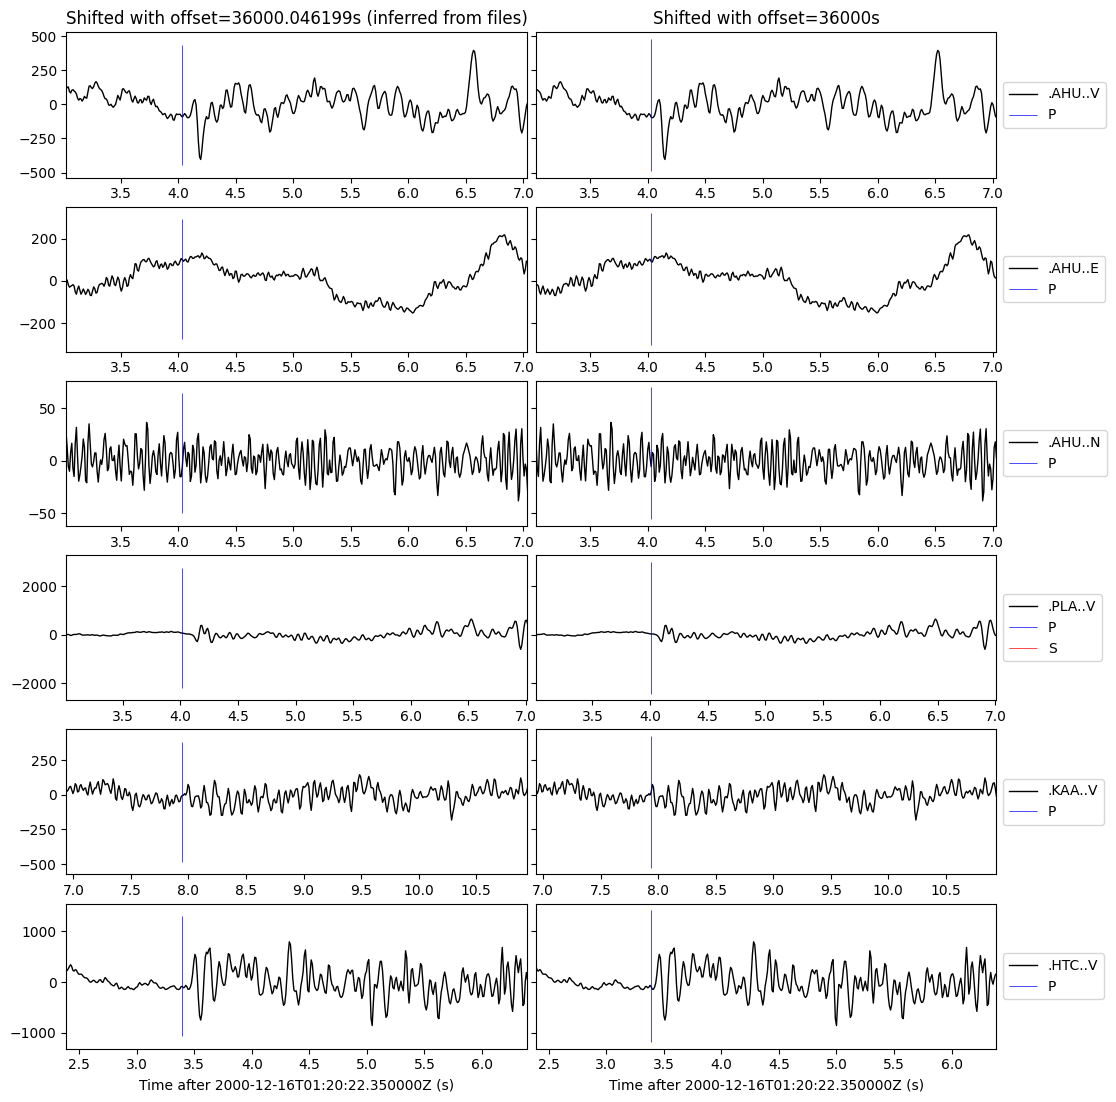

In [116]:
stas=["AHU","PLA","KAA","HTC"]
metadata={}
sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii1302192") & (whole_catalog["station_code"].isin(stas))].copy()
# metadata.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
# metadata=metadata.iloc[0]
for sta in stas:
    sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii1302192") & (whole_catalog["station_code"]==sta)].copy()
    sub_cat.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
    metadata[sta]=sub_cat.iloc[0]

st=Stream()
for sta in stas:
    st=st+sts.select(station=sta)
st

nc = len(st)

fig, axs = plt.subplots(
    nc, 2, figsize=(12, nc * 2.2), sharey="row", squeeze=False
)
plt.subplots_adjust(hspace=0.2,wspace=0.02)

st_c1=st.copy()
for tr in st_c1:
    tr.stats.starttime=tr.stats.starttime+t_offset

st_c2=st.copy()
for tr in st_c2:
    tr.stats.starttime=tr.stats.starttime+t_offset2
for i,st_c in enumerate((st_c1,st_c2)):
    starttime = min(trace.stats.starttime for trace in st_c)
    for k in range(nc):
        sta=st_c[k].stats.station
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[sta][phase]):
                picks.append((UTCDateTime(metadata[sta][phase]), phase_hints[phase]))
             
        axs[k][i].plot(
            st_c[k].times(reftime=hypoinverse_org),
            st_c[k].data,
            label=st_c[k].id,
            color="black",
            linewidth=1,
        )
        xmin = picks[0][0]-hypoinverse_org-1
        xmax = picks[0][0]-hypoinverse_org+3
        
        ymin, ymax = axs[k][i].get_ylim()
        phase_colors = {"P": "blue", "S": "red"}
        for pick, phase_label in picks:
            axs[k][i].vlines(
                pick - hypoinverse_org,
                ymin=ymin,
                ymax=ymax,
                color=phase_colors[phase_label],
                label=phase_label,
                linewidth=0.5
            )
        if i==1:
            axs[k][i].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))

        axs[k][i].set_xlim(xmin, xmax)
        if k==nc-1:
            axs[nc-1][i].set_xlabel(f"Time after {hypoinverse_org} (s)")
axs[0][0].set_title(f"Shifted with offset={t_offset}s (inferred from files)")
axs[0][1].set_title(f"Shifted with offset={t_offset2}s")
plt.savefig("1302192.jpg",dpi=600, bbox_inches="tight")

Event 1302221

35999.991981


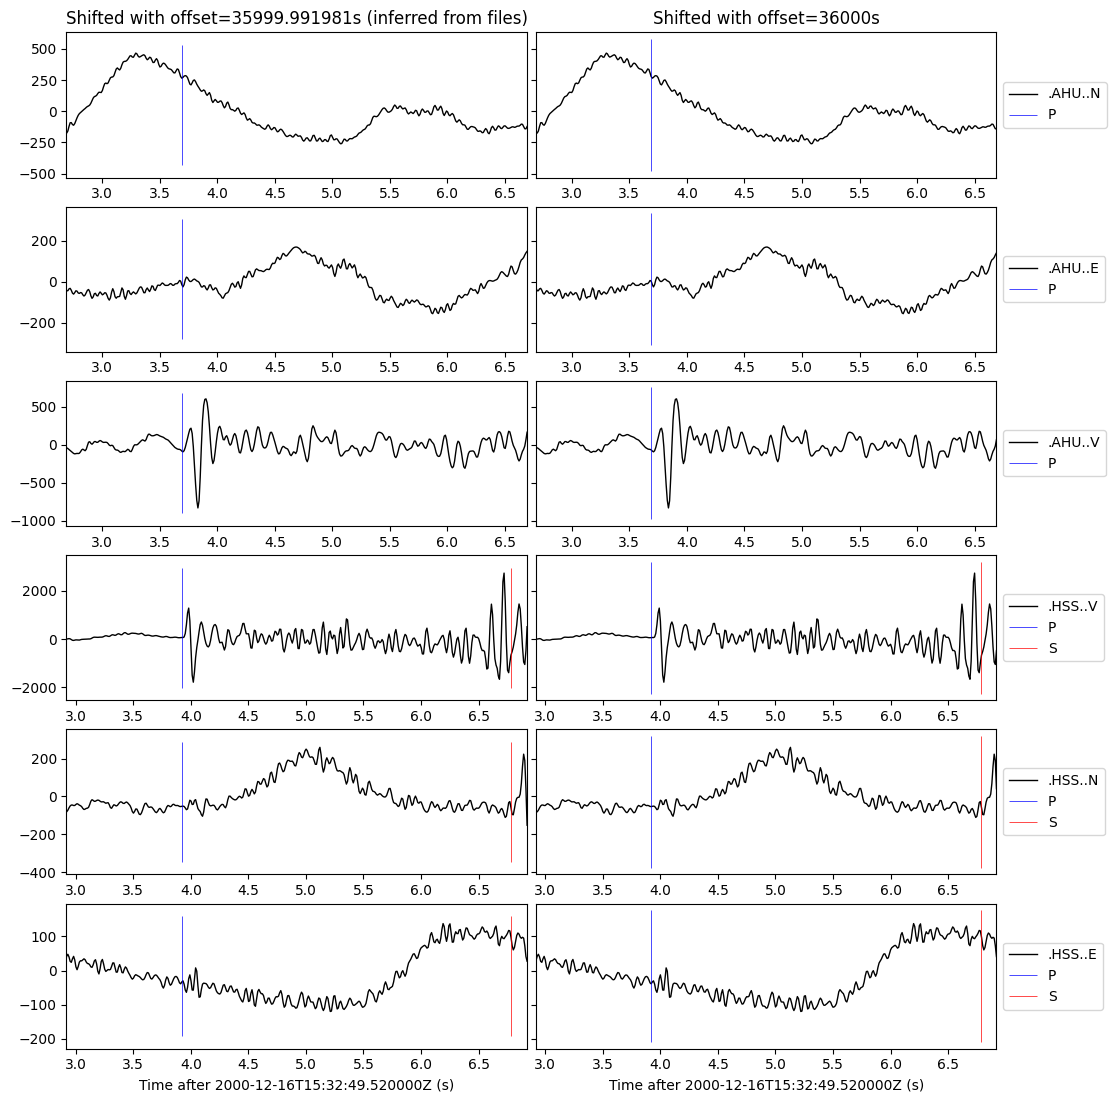

In [118]:
# event 1302221
hypoinverse_org=UTCDateTime("2000-12-16T15:32:49.520000Z")
data_org=UTCDateTime("2000-12-16T05:32:49.528019")

t_offset=hypoinverse_org-data_org
print(t_offset)
t_offset2=36000

data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2000/12/1302221.dir")
sac_files=list(data_dir.glob("*.sac"))

info_files=[str(x).replace("sac","pick") for x in sac_files]
sts=Stream()
for sac,info in zip(sac_files,info_files):
    st=read(sac)
    info_dict=read_info(info)
    start_t=info_dict["start_time"]
    st[0].stats.starttime=UTCDateTime(year=int(start_t[0].strip()),
                                      month=int(start_t[1].strip()),
                                      day=int(start_t[2].strip()),
                                      hour=int(start_t[3].strip()),
                                      minute=int(start_t[4].strip()),
                                      second=00)+float(start_t[5])
    sts+=st
sts.detrend("demean").detrend("linear")
sts.filter("bandpass", freqmin=0.1, freqmax=20.0)
stas=["AHU","HSS"]
metadata={}
sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii1302221") & (whole_catalog["station_code"].isin(stas))].copy()
# metadata.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
# metadata=metadata.iloc[0]
for sta in stas:
    sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii1302221") & (whole_catalog["station_code"]==sta)].copy()
    sub_cat.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
    metadata[sta]=sub_cat.iloc[0]

st=Stream()
for sta in stas:
    st=st+sts.select(station=sta)
st

nc = len(st)

fig, axs = plt.subplots(
    nc, 2, figsize=(12, nc * 2.2), sharey="row", squeeze=False
)
plt.subplots_adjust(hspace=0.2,wspace=0.02)

st_c1=st.copy()
for tr in st_c1:
    tr.stats.starttime=tr.stats.starttime+t_offset

st_c2=st.copy()
for tr in st_c2:
    tr.stats.starttime=tr.stats.starttime+t_offset2
for i,st_c in enumerate((st_c1,st_c2)):
    starttime = min(trace.stats.starttime for trace in st_c)
    for k in range(nc):
        sta=st_c[k].stats.station
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[sta][phase]):
                picks.append((UTCDateTime(metadata[sta][phase]), phase_hints[phase]))
             
        axs[k][i].plot(
            st_c[k].times(reftime=hypoinverse_org),
            st_c[k].data,
            label=st_c[k].id,
            color="black",
            linewidth=1,
        )
        xmin = picks[0][0]-hypoinverse_org-1
        xmax = picks[0][0]-hypoinverse_org+3
        
        ymin, ymax = axs[k][i].get_ylim()
        phase_colors = {"P": "blue", "S": "red"}
        for pick, phase_label in picks:
            axs[k][i].vlines(
                pick - hypoinverse_org,
                ymin=ymin,
                ymax=ymax,
                color=phase_colors[phase_label],
                label=phase_label,
                linewidth=0.5
            )
        if i==1:
            axs[k][i].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))

        axs[k][i].set_xlim(xmin, xmax)
        if k==nc-1:
            axs[nc-1][i].set_xlabel(f"Time after {hypoinverse_org} (s)")
axs[0][0].set_title(f"Shifted with offset={t_offset}s (inferred from files)")
axs[0][1].set_title(f"Shifted with offset={t_offset2}s")
plt.savefig("1302221.jpg",dpi=600, bbox_inches="tight")

In [89]:
stas=[]
for st in sts:
    stas.append(st.stats["station"])
for sta in np.unique(stas):
    st=sts.select(station=sta)
    if len(st)>3:
        print(sta)

AIN


Event 1304802

35999.958457


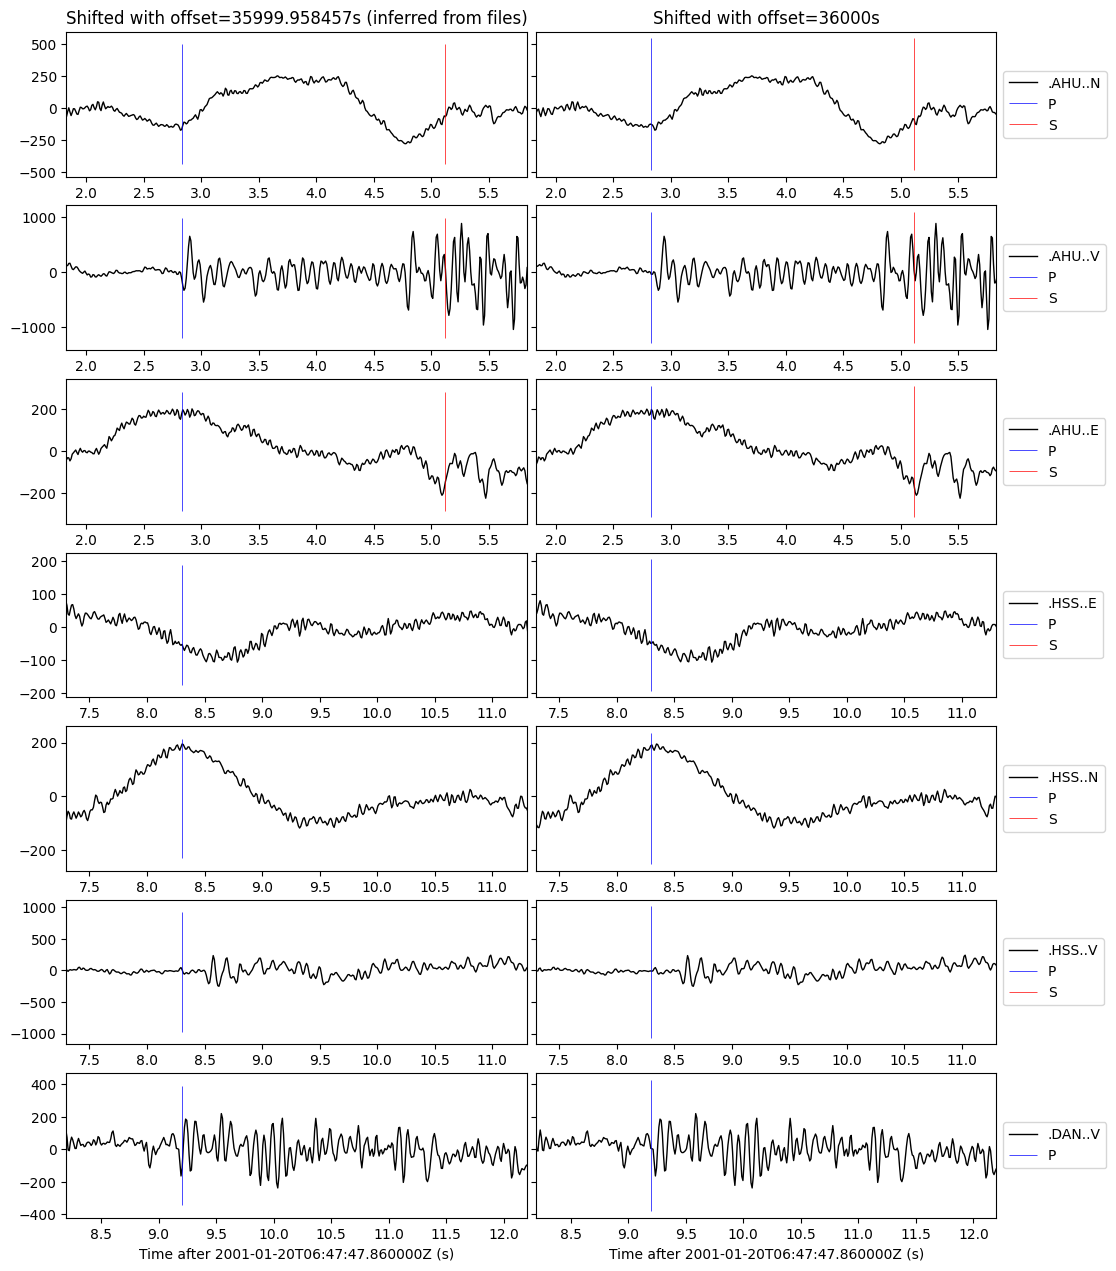

In [120]:
# event 1304802
hypoinverse_org=UTCDateTime("2001-01-20T06:47:47.860000Z")
data_org=UTCDateTime("2001-01-19T20:47:47.901543")

t_offset=hypoinverse_org-data_org
print(t_offset)
t_offset2=36000

data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2001/01/1304802.dir")
sac_files=list(data_dir.glob("*.sac"))

info_files=[str(x).replace("sac","pick") for x in sac_files]
sts=Stream()
for sac,info in zip(sac_files,info_files):
    st=read(sac)
    info_dict=read_info(info)
    start_t=info_dict["start_time"]
    st[0].stats.starttime=UTCDateTime(year=int(start_t[0].strip()),
                                      month=int(start_t[1].strip()),
                                      day=int(start_t[2].strip()),
                                      hour=int(start_t[3].strip()),
                                      minute=int(start_t[4].strip()),
                                      second=00)+float(start_t[5])
    sts+=st
sts.detrend("demean").detrend("linear")
sts.filter("bandpass", freqmin=0.1, freqmax=30.0)
stas=["AHU","HSS","DAN"]
metadata={}
sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii1304802") & (whole_catalog["station_code"].isin(stas))].copy()
# metadata.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
# metadata=metadata.iloc[0]
for sta in stas:
    sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii1304802") & (whole_catalog["station_code"]==sta)].copy()
    sub_cat.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
    metadata[sta]=sub_cat.iloc[0]

st=Stream()
for sta in stas:
    st=st+sts.select(station=sta)
st

nc = len(st)

fig, axs = plt.subplots(
    nc, 2, figsize=(12, nc * 2.2), sharey="row", squeeze=False
)
plt.subplots_adjust(hspace=0.2,wspace=0.02)

st_c1=st.copy()
for tr in st_c1:
    tr.stats.starttime=tr.stats.starttime+t_offset

st_c2=st.copy()
for tr in st_c2:
    tr.stats.starttime=tr.stats.starttime+t_offset2
for i,st_c in enumerate((st_c1,st_c2)):
    starttime = min(trace.stats.starttime for trace in st_c)
    for k in range(nc):
        sta=st_c[k].stats.station
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[sta][phase]):
                picks.append((UTCDateTime(metadata[sta][phase]), phase_hints[phase]))
             
        axs[k][i].plot(
            st_c[k].times(reftime=hypoinverse_org),
            st_c[k].data,
            label=st_c[k].id,
            color="black",
            linewidth=1,
        )
        xmin = picks[0][0]-hypoinverse_org-1
        xmax = picks[0][0]-hypoinverse_org+3
        
        ymin, ymax = axs[k][i].get_ylim()
        phase_colors = {"P": "blue", "S": "red"}
        for pick, phase_label in picks:
            axs[k][i].vlines(
                pick - hypoinverse_org,
                ymin=ymin,
                ymax=ymax,
                color=phase_colors[phase_label],
                label=phase_label,
                linewidth=0.5
            )
        if i==1:
            axs[k][i].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))

        axs[k][i].set_xlim(xmin, xmax)
        if k==nc-1:
            axs[nc-1][i].set_xlabel(f"Time after {hypoinverse_org} (s)")
axs[0][0].set_title(f"Shifted with offset={t_offset}s (inferred from files)")
axs[0][1].set_title(f"Shifted with offset={t_offset2}s")
plt.savefig("1304802.jpg",dpi=600, bbox_inches="tight")

In [104]:
stas=[]
for st in sts:
    stas.append(st.stats["station"])
for sta in np.unique(stas):
    st=sts.select(station=sta)
    if len(st)>3:
        print(sta)
        print([tr.stats.channel for tr in st])

AIN
['Z', 'N', 'E', 'V']


In [ ]:
sts.select(station="AHU")

Event 1302232

In [18]:
# event 1302232
UTCDateTime("2000-12-16T17:22:51.440000Z")-UTCDateTime("2000-12-16T07:22:51.300491")

36000.139509

In [112]:
hypoinverse_org=UTCDateTime("2000-12-16T17:22:51.440000Z")
data_org=UTCDateTime("2000-12-16T07:22:51.300491")

t_offset=hypoinverse_org-data_org
print(t_offset)
t_offset2=36000

data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2000/12/1302232.dir")
sac_files=list(data_dir.glob("*.sac"))

info_files=[str(x).replace("sac","pick") for x in sac_files]
sts=Stream()
for sac,info in zip(sac_files,info_files):
    st=read(sac)
    info_dict=read_info(info)
    start_t=info_dict["start_time"]
    st[0].stats.starttime=UTCDateTime(year=int(start_t[0].strip()),
                                      month=int(start_t[1].strip()),
                                      day=int(start_t[2].strip()),
                                      hour=int(start_t[3].strip()),
                                      minute=int(start_t[4].strip()),
                                      second=00)+float(start_t[5])
    sts+=st
sts.detrend("demean").detrend("linear")
sts.filter("bandpass", freqmin=0.1, freqmax=20.0)

stas=["ESR","PAU","MLO"]
metadata={}
sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii1302232") & (whole_catalog["station_code"].isin(stas))].copy()
# metadata.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
# metadata=metadata.iloc[0]
for sta in stas:
    sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii1302232") & (whole_catalog["station_code"]==sta)].copy()
    sub_cat.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
    metadata[sta]=sub_cat.iloc[0]

st=Stream()
for sta in stas:
    st=st+sts.select(station=sta)
st

36000.139509


7 Trace(s) in Stream:
.ESR..V | 2000-12-16T07:22:33.790001Z - 2000-12-16T07:23:52.840001Z | 100.0 Hz, 7906 samples
.PAU..N | 2000-12-16T07:22:33.790001Z - 2000-12-16T07:23:52.840001Z | 100.0 Hz, 7906 samples
.PAU..V | 2000-12-16T07:22:33.790001Z - 2000-12-16T07:23:52.840001Z | 100.0 Hz, 7906 samples
.PAU..E | 2000-12-16T07:22:33.790001Z - 2000-12-16T07:23:52.840001Z | 100.0 Hz, 7906 samples
.MLO..V | 2000-12-16T07:22:33.790001Z - 2000-12-16T07:23:52.840001Z | 100.0 Hz, 7906 samples
.MLO..E | 2000-12-16T07:22:33.790001Z - 2000-12-16T07:23:52.840001Z | 100.0 Hz, 7906 samples
.MLO..N | 2000-12-16T07:22:33.790001Z - 2000-12-16T07:23:52.840001Z | 100.0 Hz, 7906 samples

In [ ]:
nc = len(st)

fig, axs = plt.subplots(
    nc, 2, figsize=(12, nc * 2.2), sharey="row", squeeze=False
)
plt.subplots_adjust(hspace=0.2,wspace=0.02)

st_c1=st.copy()
for tr in st_c1:
    tr.stats.starttime=tr.stats.starttime+t_offset

st_c2=st.copy()
for tr in st_c2:
    tr.stats.starttime=tr.stats.starttime+t_offset2
for i,st_c in enumerate((st_c1,st_c2)):
    starttime = min(trace.stats.starttime for trace in st_c)
    for k in range(nc):
        sta=st_c[k].stats.station
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[sta][phase]):
                picks.append((UTCDateTime(metadata[sta][phase]), phase_hints[phase]))
             
        axs[k][i].plot(
            st_c[k].times(reftime=hypoinverse_org),
            st_c[k].data,
            label=st_c[k].id,
            color="black",
            linewidth=1,
        )
        xmin = picks[0][0]-hypoinverse_org-0.5
        xmax = picks[0][0]-hypoinverse_org+5
        
        ymin, ymax = axs[k][i].get_ylim()
        phase_colors = {"P": "blue", "S": "red"}
        for pick, phase_label in picks:
            axs[k][i].vlines(
                pick - hypoinverse_org,
                ymin=ymin,
                ymax=ymax,
                color=phase_colors[phase_label],
                label=phase_label,
                linewidth=0.5
            )
        if i==1:
            axs[k][i].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))

        axs[k][i].set_xlim(xmin, xmax)
        if k==nc-1:
            axs[nc-1][i].set_xlabel(f"Time after {hypoinverse_org} (s)")
axs[0][0].set_title(f"Shifted with offset={t_offset}s (inferred from files)")
axs[0][1].set_title(f"Shifted with offset={t_offset2}s")
plt.savefig("1302232.jpg",dpi=600, bbox_inches="tight")

Event 5596053

In [94]:
hypoinverse_org=UTCDateTime("2007-10-16T15:49:51.660000Z")
data_org=UTCDateTime("2007-10-16T05:49:51.635567")

t_offset=hypoinverse_org-data_org
print(t_offset)
t_offset2=36000

data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2007/10/5596053.dir")
sac_files=list(data_dir.glob("*.sac"))

info_files=[str(x).replace("sac","pick") for x in sac_files]
sts=Stream()
for sac,info in zip(sac_files,info_files):
    st=read(sac)
    info_dict=read_info(info)
    start_t=info_dict["start_time"]
    st[0].stats.starttime=UTCDateTime(year=int(start_t[0].strip()),
                                      month=int(start_t[1].strip()),
                                      day=int(start_t[2].strip()),
                                      hour=int(start_t[3].strip()),
                                      minute=int(start_t[4].strip()),
                                      second=00)+float(start_t[5])
    sts+=st
sts.detrend("demean").detrend("linear")
sts.filter("bandpass", freqmin=0.1, freqmax=20.0)

36000.024433


97 Trace(s) in Stream:

.PAU..E | 2007-10-16T05:49:35.840000Z - 2007-10-16T05:51:05.610000Z | 100.0 Hz, 8978 samples
...
(95 other traces)
...
.CPK..V | 2007-10-16T05:49:35.840000Z - 2007-10-16T05:51:05.610000Z | 100.0 Hz, 8978 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [95]:
stas=[]
for st in sts:
    stas.append(st.stats["station"])
for sta in np.unique(stas):
    st=sts.select(station=sta)
    if len(st)>3:
        print(sta)
        print([tr.stats.channel for tr in st])

AIN
['N', 'E', 'Z', 'V']


In [ ]:
stas=["AHU","AIN"]
metadata={}
sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii5596053") & (whole_catalog["station_code"].isin(stas))].copy()
# metadata.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
# metadata=metadata.iloc[0]
for sta in stas:
    sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii5596053") & (whole_catalog["station_code"]==sta)].copy()
    sub_cat.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
    metadata[sta]=sub_cat.iloc[0]

st=Stream()
for sta in stas:
    st=st+sts.select(station=sta)
st

In [ ]:
nc = len(st)

fig, axs = plt.subplots(
    nc, 2, figsize=(12, nc * 2.2), sharey="row", squeeze=False
)
plt.subplots_adjust(hspace=0.2,wspace=0.02)

st_c1=st.copy()
for tr in st_c1:
    tr.stats.starttime=tr.stats.starttime+t_offset

st_c2=st.copy()
for tr in st_c2:
    tr.stats.starttime=tr.stats.starttime+t_offset2
for i,st_c in enumerate((st_c1,st_c2)):
    starttime = min(trace.stats.starttime for trace in st_c)
    for k in range(nc):
        sta=st_c[k].stats.station
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[sta][phase]):
                picks.append((UTCDateTime(metadata[sta][phase]), phase_hints[phase]))
             
        axs[k][i].plot(
            st_c[k].times(reftime=hypoinverse_org),
            st_c[k].data,
            label=st_c[k].id,
            color="black",
            linewidth=1,
        )
        xmin = picks[0][0]-hypoinverse_org-1
        xmax = picks[0][0]-hypoinverse_org+6
        
        ymin, ymax = axs[k][i].get_ylim()
        phase_colors = {"P": "blue", "S": "red"}
        for pick, phase_label in picks:
            axs[k][i].vlines(
                pick - hypoinverse_org,
                ymin=ymin,
                ymax=ymax,
                color=phase_colors[phase_label],
                label=phase_label,
                linewidth=0.5
            )
        if i==1:
            axs[k][i].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))

        axs[k][i].set_xlim(xmin, xmax)
        if k==nc-1:
            axs[nc-1][i].set_xlabel(f"Time after {hypoinverse_org} (s)")
axs[0][0].set_title(f"Shifted with offset={t_offset}s (inferred from files)")
axs[0][1].set_title(f"Shifted with offset={t_offset2}s")
plt.savefig("5596053.jpg",dpi=600, bbox_inches="tight")

Event 5700741

In [47]:
# event 5700741
hypoinverse_org=UTCDateTime("2009-03-17T17:44:59.570000Z")
data_org=UTCDateTime("2009-03-17T07:44:59.653786")

t_offset=hypoinverse_org-data_org
print(t_offset)
t_offset2=36000

data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2009/03/5700741.dir")
sac_files=list(data_dir.glob("*.sac"))

info_files=[str(x).replace("sac","pick") for x in sac_files]
sts=Stream()
for sac,info in zip(sac_files,info_files):
    st=read(sac)
    info_dict=read_info(info)
    start_t=info_dict["start_time"]
    if info_dict["station code"]==["AIN"]:
        print(info)
    st[0].stats.starttime=UTCDateTime(year=int(start_t[0].strip()),
                                      month=int(start_t[1].strip()),
                                      day=int(start_t[2].strip()),
                                      hour=int(start_t[3].strip()),
                                      minute=int(start_t[4].strip()),
                                      second=00)+float(start_t[5])
    sts+=st
sts.detrend("demean").detrend("linear")
sts.filter("bandpass", freqmin=0.1, freqmax=45.0)

35999.916214
/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2009/03/5700741.dir/5700741.00001.00063.pick
/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2009/03/5700741.dir/5700741.00001.00024.pick
/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2009/03/5700741.dir/5700741.00001.00073.pick
/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/2009/03/5700741.dir/5700741.00001.00062.pick


97 Trace(s) in Stream:

.HSS..E | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
...
(95 other traces)
...
.KII..V | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [9]:
info_dict

{'station code': ['KII'],
 'channel': ['V'],
 'origin_time': ['3', '0', '17', '7', '44', '59.653786'],
 'start_time': ['2009', '3', '17', '7', '44', '0.669998'],
 'comment': ['70.390', 'P', '*', 'E', 'U', '2', 'SET:', '1', 'PIN:', '21']}

In [44]:
st=sts.select(station="AIN")
st

4 Trace(s) in Stream:
.AIN..V | 1996-09-07T13:20:32.570000Z - 1996-09-07T13:22:14.860000Z | 100.0 Hz, 10230 samples
.AIN..E | 1996-09-07T13:20:32.570000Z - 1996-09-07T13:22:14.860000Z | 100.0 Hz, 10230 samples
.AIN..Z | 1996-09-07T13:20:32.570000Z - 1996-09-07T13:22:14.860000Z | 100.0 Hz, 10230 samples
.AIN..N | 1996-09-07T13:20:32.570000Z - 1996-09-07T13:22:14.860000Z | 100.0 Hz, 10230 samples

In [1097]:
st.select(channel="*[ENZV]")

4 Trace(s) in Stream:
.AIN..E | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.AIN..V | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.AIN..Z | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.AIN..N | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples

In [946]:
st0=st.select(channel="*[ENV]")

In [958]:
st0[1].stats.channel="Z"

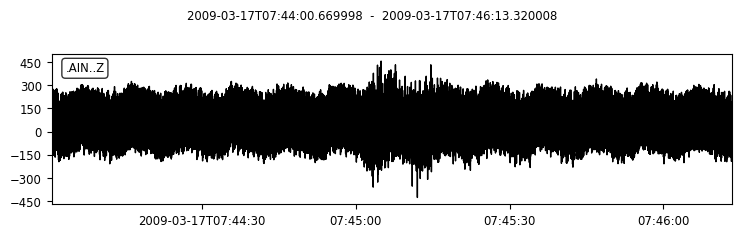

In [963]:
st.plot();

In [940]:
st=sts.select(station="AHU")
if st[1].stats.channel=="V":
    st[1].stats.channel="Z"

In [943]:
sts

97 Trace(s) in Stream:

.HSS..E | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
...
(95 other traces)
...
.KII..V | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [1014]:
print(st[1].stats.sac)

AttribDict({'delta': 0.010000001, 'depmax': 6502.0, 'b': 0.0, 'e': 132.66, 'stla': 19.375, 'stlo': -155.46033, 'stel': 1524.0, 'evla': 19.331093, 'evlo': -155.17711, 'evdp': -7.94874, 'dist': 30.151493, 'az': 279.32336, 'baz': 99.22949, 'gcarc': 0.27115887, 'nzyear': 2009, 'nzjday': 76, 'nzhour': 7, 'nzmin': 44, 'nzsec': 0, 'nzmsec': 669, 'nvhdr': 6, 'norid': 0, 'nevid': 0, 'npts': 13266, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 0, 'lcalda': 1, 'unused23': 0, 'kstnm': 'AIN', 'kcmpnm': 'V', 'kinst': '', 'kevnm': ''})


In [1020]:
print(st[1].stats.sac.get("stel",None))

1524.0


In [1016]:
dist, azimuth, back_azimuth = gps2dist_azimuth(
    st[1].stats.sac.get("evla",None),
    st[1].stats.sac.get("evlo",None),
    st[1].stats.sac.get("stla",None),
    st[1].stats.sac.get("stlo",None),
)

In [1017]:
dist

30151.492505443857

In [1031]:
Path(str(sac_files[0].parent).replace("dir","dir1")).exists()

False

In [1036]:
st = st.select(channel="*[ENZ]").copy()

In [1035]:
st

3 Trace(s) in Stream:
.AIN..E | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.AIN..Z | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.AIN..N | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples

In [1018]:
azimuth

279.3233496276865

In [1019]:
back_azimuth

99.2294942604132

In [978]:
np.any(["V"==x.stats.channel[-1] for x in st]) and np.any(["Z"==x.stats.channel[-1] for x in st])

True

In [990]:
st[0].stats.channel=st[0].stats.channel[:-1]+"V"

In [997]:
st

4 Trace(s) in Stream:
.AIN..E | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.AIN..V | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.AIN..Z | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.AIN..N | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples

In [998]:
if np.any(["V" == x.stats.channel[-1] for x in st]) and np.any(
    ["Z" == x.stats.channel[-1] for x in st]
):
    st = st.select(channel="*[ENZ]")
for tr in st:
    if len(tr.stats.channel) == 1:
        tr.stats.channel = "EH" + tr.stats.channel
    if tr.stats.channel[-1]=="V":
        tr.stats.channel=tr.stats.channel[:-1]+"Z"

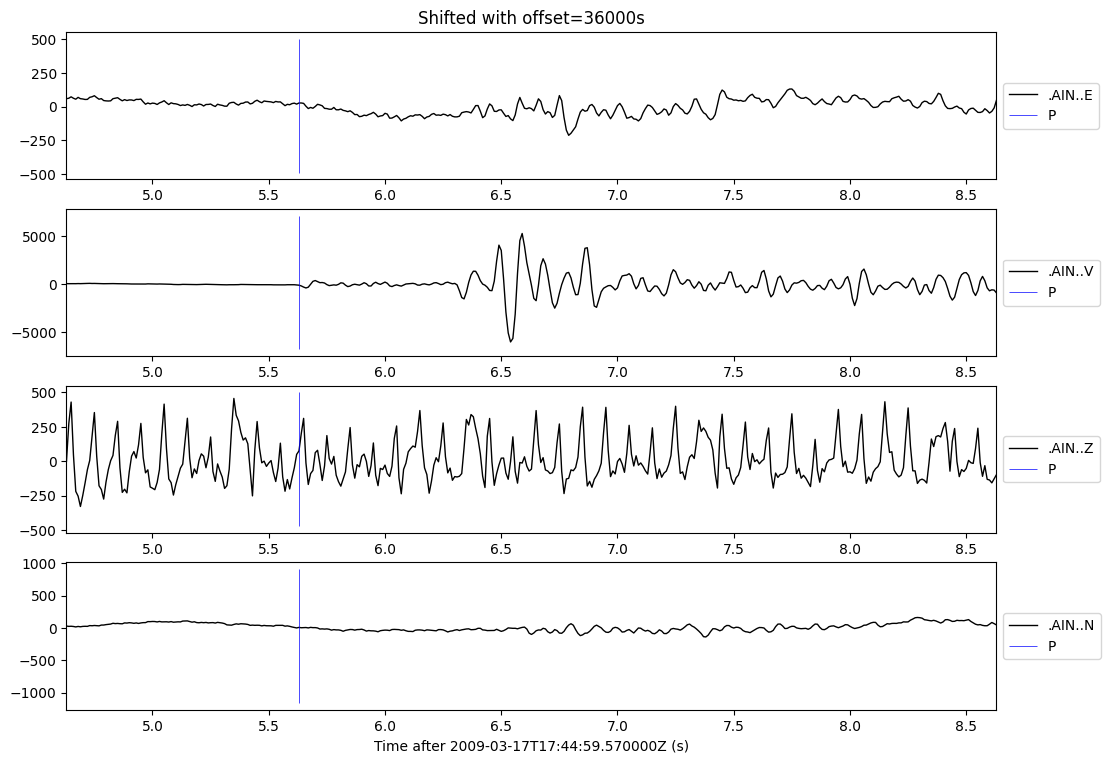

In [66]:
# stas=["AHU","AIN"]
stas=["AIN"]
metadata={}
sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii5700741") & (whole_catalog["station_code"].isin(stas))].copy()
# metadata.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
# metadata=metadata.iloc[0]
for sta in stas:
    sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii5700741") & (whole_catalog["station_code"]==sta)].copy()
    sub_cat.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
    metadata[sta]=sub_cat.iloc[0]

st=Stream()
for sta in stas:
    st=st+sts.select(station=sta)
st

nc = len(st)

fig, axs = plt.subplots(
    nc, 1, figsize=(12, nc * 2.2), sharey="row", squeeze=False
)
plt.subplots_adjust(hspace=0.2,wspace=0.02)

st_c1=st.copy()
for tr in st_c1:
    tr.stats.starttime=tr.stats.starttime+t_offset

st_c2=st.copy()
for tr in st_c2:
    tr.stats.starttime=tr.stats.starttime+t_offset2
for i,st_c in enumerate([st_c2]):
    starttime = min(trace.stats.starttime for trace in st_c)
    for k in range(nc):
        sta=st_c[k].stats.station
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[sta][phase]):
                picks.append((UTCDateTime(metadata[sta][phase]), phase_hints[phase]))
             
        axs[k][i].plot(
            st_c[k].times(reftime=hypoinverse_org),
            st_c[k].data,
            label=st_c[k].id,
            color="black",
            linewidth=1,
        )
        xmin = picks[0][0]-hypoinverse_org-1
        xmax = picks[0][0]-hypoinverse_org+3
        
        ymin, ymax = axs[k][i].get_ylim()
        phase_colors = {"P": "blue", "S": "red"}
        for pick, phase_label in picks:
            axs[k][i].vlines(
                pick - hypoinverse_org,
                ymin=ymin,
                ymax=ymax,
                color=phase_colors[phase_label],
                label=phase_label,
                linewidth=0.5
            )
        # if i==1:
        #     axs[k][i].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))
        axs[k][-1].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))

        axs[k][i].set_xlim(xmin, xmax)
        if k==nc-1:
            axs[nc-1][i].set_xlabel(f"Time after {hypoinverse_org} (s)")
axs[0][0].set_title(f"Shifted with offset={t_offset}s (inferred from files)")
axs[0][-1].set_title(f"Shifted with offset={t_offset2}s")
plt.savefig("5700741.jpg",dpi=600, bbox_inches="tight")

206216

In [1089]:
# event 206216
hypoinverse_org=UTCDateTime("1986-01-01T12:45:11.250000Z")
data_org=UTCDateTime("1986-01-01T02:45:10.875225")

t_offset=hypoinverse_org-data_org
print(t_offset)
t_offset2=36000

data_dir=Path("/mnt/DATA2/YiyuanZhong/LP_catalog/Hawaii/annualCUSPwaveforms/1986/01/206216.dir")
sac_files=list(data_dir.glob("*.sac"))

info_files=[str(x).replace("sac","pick") for x in sac_files]
sts=Stream()
for sac,info in zip(sac_files,info_files):
    st=read(sac)
    info_dict=read_info(info)
    start_t=info_dict["start_time"]
    st[0].stats.starttime=UTCDateTime(year=int(start_t[0].strip()),
                                      month=int(start_t[1].strip()),
                                      day=int(start_t[2].strip()),
                                      hour=int(start_t[3].strip()),
                                      minute=int(start_t[4].strip()),
                                      second=00)+float(start_t[5])
    sts+=st
sts.detrend("demean").detrend("linear")
sts.filter("bandpass", freqmin=0.1, freqmax=45.0)

36000.374775


74 Trace(s) in Stream:

.SPT.. | 1986-01-01T02:45:07.050003Z - 1986-01-01T02:45:51.040003Z | 100.0 Hz, 4400 samples
...
(72 other traces)
...
.MOK.. | 1986-01-01T02:45:07.050003Z - 1986-01-01T02:45:51.040003Z | 100.0 Hz, 4400 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [1081]:
st=sts[:1].copy()

In [1087]:
st[0].stats.channel==''

True

In [1093]:
st.select(channel="*[ENZV]").copy()

0 Trace(s) in Stream:


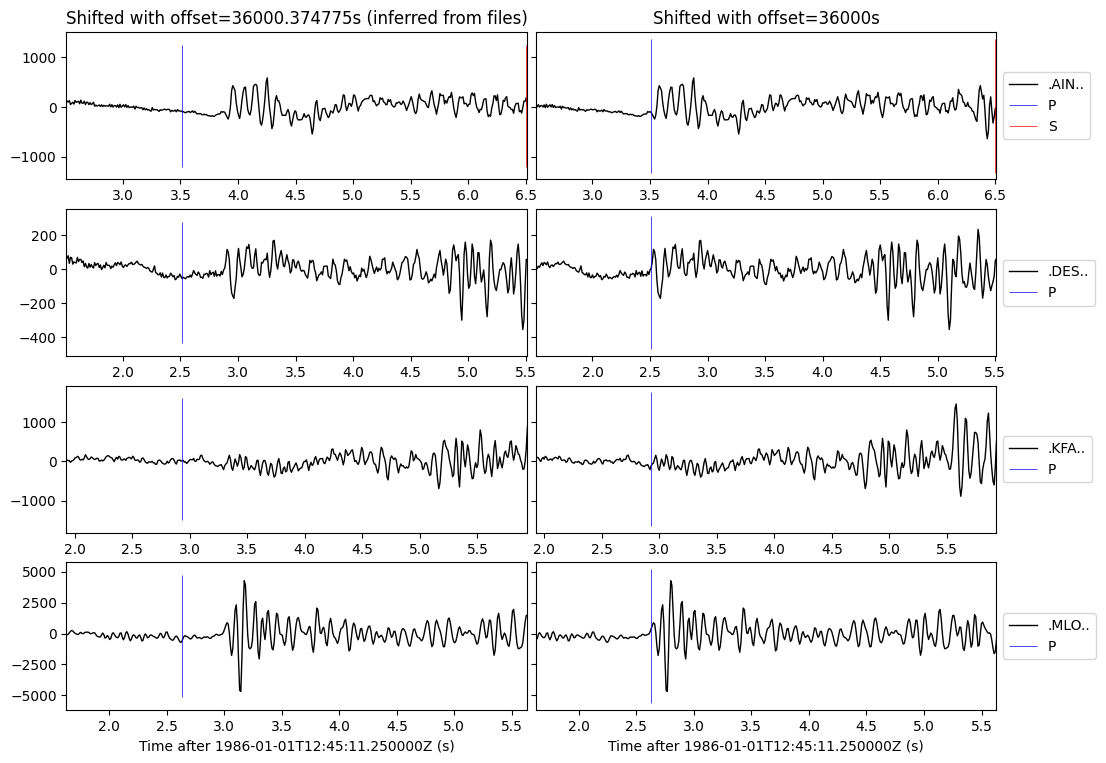

In [1091]:
stas=["AIN","DES","KFA","MLO"]
metadata={}
sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii206216") & (whole_catalog["station_code"].isin(stas))].copy()
# metadata.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
# metadata=metadata.iloc[0]
for sta in stas:
    sub_cat=whole_catalog[(whole_catalog["source_id"]=="hawaii206216") & (whole_catalog["station_code"]==sta)].copy()
    sub_cat.drop_duplicates(subset=["source_id","station_code"],keep="first",inplace=True)
    metadata[sta]=sub_cat.iloc[0]

st=Stream()
for sta in stas:
    st=st+sts.select(station=sta)
st

nc = len(st)

fig, axs = plt.subplots(
    nc, 2, figsize=(12, nc * 2.2), sharey="row", squeeze=False
)
plt.subplots_adjust(hspace=0.2,wspace=0.02)

st_c1=st.copy()
for tr in st_c1:
    tr.stats.starttime=tr.stats.starttime+t_offset

st_c2=st.copy()
for tr in st_c2:
    tr.stats.starttime=tr.stats.starttime+t_offset2
for i,st_c in enumerate((st_c1,st_c2)):
    starttime = min(trace.stats.starttime for trace in st_c)
    for k in range(nc):
        sta=st_c[k].stats.station
        picks = []
        phase_hints = {"trace_p_arrival_time": "P", "trace_s_arrival_time": "S"}
        for phase in ["trace_p_arrival_time", "trace_s_arrival_time"]:
            if pd.notna(metadata[sta][phase]):
                picks.append((UTCDateTime(metadata[sta][phase]), phase_hints[phase]))
             
        axs[k][i].plot(
            st_c[k].times(reftime=hypoinverse_org),
            st_c[k].data,
            label=st_c[k].id,
            color="black",
            linewidth=1,
        )
        xmin = picks[0][0]-hypoinverse_org-1
        xmax = picks[0][0]-hypoinverse_org+3
        
        ymin, ymax = axs[k][i].get_ylim()
        phase_colors = {"P": "blue", "S": "red"}
        for pick, phase_label in picks:
            axs[k][i].vlines(
                pick - hypoinverse_org,
                ymin=ymin,
                ymax=ymax,
                color=phase_colors[phase_label],
                label=phase_label,
                linewidth=0.5
            )
        if i==1:
            axs[k][i].legend(loc="center left", bbox_to_anchor=(1.00, 0, 0.2, 1))

        axs[k][i].set_xlim(xmin, xmax)
        if k==nc-1:
            axs[nc-1][i].set_xlabel(f"Time after {hypoinverse_org} (s)")
axs[0][0].set_title(f"Shifted with offset={t_offset}s (inferred from files)")
axs[0][1].set_title(f"Shifted with offset={t_offset2}s")
plt.savefig("206216.jpg",dpi=600, bbox_inches="tight")

In [1076]:
st

8 Trace(s) in Stream:
.AIN..E | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.AIN..V | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.AIN..Z | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.AIN..N | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.DES..V | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.MLO..V | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.MLO..N | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples
.MLO..E | 2009-03-17T07:44:00.669998Z - 2009-03-17T07:46:13.320008Z | 100.0 Hz, 13266 samples

# Hawaii 2012 to 2021

In [20]:
hawaii2 = volpick.data.HawaiiDataset(
    root_folder_name="hawaii2012to2021",
    cat_file_name="hawaii_catalog2012to2021",
)

The default saving directory is used: /home/zhongyiyuan/DATA/my_data/hawaii2012to2021
/home/zhongyiyuan/DATA/my_data/hawaii2012to2021 exists


In [21]:
whole_catalog2=hawaii2.read(format="csv")
print(f"The whole catalog includes {len(whole_catalog2)} waveforms, where there are")
print(f""" {len(whole_catalog2[whole_catalog2["source_type"]!="lp"])} waveforms for regular earthquakes""")
print(f""" {len(whole_catalog2[whole_catalog2["source_type"]=="lp"])} waveforms for long-period earthquakes""")

The whole catalog includes 6308981 waveforms, where there are
 6245571 waveforms for regular earthquakes
 63410 waveforms for long-period earthquakes


In [22]:
metadata = whole_catalog2[
    (pd.notna(whole_catalog2["trace_s_arrival_time"]))
    & (pd.notna(whole_catalog2["trace_p_arrival_time"]))
].copy()

In [23]:
# lp_table = metadata[metadata["source_type"] == "lp"].copy()
# rg_table = metadata[metadata["source_type"] != "lp"].copy()
# lp_ids = lp_table.drop_duplicates(
#     subset="source_id", keep="first", ignore_index=True, inplace=False
# )["source_id"]
# rg_ids = rg_table.drop_duplicates(
#     subset="source_id", keep="first", ignore_index=True, inplace=False
# )["source_id"]

# n_lp_events = len(lp_ids)
# n_rg_events = len(rg_ids)
# assert n_rg_events > n_lp_events

# # select the same number of events
# rand_events_idxs = np.sort(
#     np.random.default_rng(seed=50).choice(
#         rg_ids, size=n_lp_events * 5, replace=False
#     )
# )
# rand_rg_table = rg_table[rg_table["source_id"].isin(rand_events_idxs)].copy()
# new_table=pd.concat([rand_rg_table,lp_table],ignore_index=True)
# print(len(new_table))

95268


In [111]:
download_table=pd.read_csv(hawaii2.save_dir/"mseed_log"/"downloads.csv")
print(f"{len(download_table)} seismograms have been downloaded sucessfully.")
print(f""" {len(download_table[download_table["source_type"]!="lp"])} waveforms of regular earthquakes""")
print(f""" {len(download_table[download_table["source_type"]=="lp"])} waveforms of long-period earthquakes""")
failed_downloads=pd.read_csv(hawaii2.save_dir/"mseed_log"/"failed_downloads.csv")
solvable_errors=failed_downloads[~failed_downloads["Error"].isin(["FDSNNoDataException"])]
nodata_errors=failed_downloads[failed_downloads["Error"]=="FDSNNoDataException"]
print(f"{len(solvable_errors)} failed downloads are not due to FDSNNoDataException")
print(f"{len(nodata_errors)} FDSNNoDataException")

90951 seismograms have been downloaded sucessfully.
 74038 waveforms of regular earthquakes
 16913 waveforms of long-period earthquakes
0 failed downloads are not due to FDSNNoDataException
3317 FDSNNoDataException


In [126]:
# download_table2=exclude_close_events(whole_catalog2,download_table, 75,75)
# print(len(download_table))
# print(len(download_table2))
# print(len(download_table[download_table["source_type"]=="lp"]))
# print(len(download_table2[download_table2["source_type"]=="lp"]))

90951
70576
16913
15337


In [25]:
lp_data=download_table[download_table["source_type"]=="lp"]
rg_data=download_table[download_table["source_type"]!="lp"]
lp_data
print("For all the downloaded data:")
print(f"Minimum date: {min(download_table['source_origin_time'])}")
print(f"Maximum date: {max(download_table['source_origin_time'])}")

print()
print("For the downloaded lp waveforms:")
print(f"Minimum date: {min(lp_data['source_origin_time'])}")
print(f"Maximum date: {max(lp_data['source_origin_time'])}")
print()
print("For the downloaded regular earthquakes waveforms:")
print(f"Minimum date: {min(rg_data['source_origin_time'])}")
print(f"Maximum date: {max(rg_data['source_origin_time'])}")

For all the downloaded data:
Minimum date: 2012-01-07T05:47:56.280000Z
Maximum date: 2021-09-30T15:45:50.700000Z

For the downloaded lp waveforms:
Minimum date: 2012-02-03T15:02:06.960000Z
Maximum date: 2021-06-28T14:09:14.280000Z

For the downloaded regular earthquakes waveforms:
Minimum date: 2012-01-07T05:47:56.280000Z
Maximum date: 2021-09-30T15:45:50.700000Z


In [15]:
abnormal_traces=pd.read_csv(hawaii2.save_dir/"mseed_log"/"abnormal_traces.csv")
print(f"{len(abnormal_traces)} abnormal traces")

1000 abnormal traces


In [12]:
1000+3317+90951

95268

In [9]:
np.unique(abnormal_traces["remark"])

array(['No_waveforms', 'P<origin', 'P>S', 'not_in_inventory',
       'phases_in_gap'], dtype=object)

In [19]:
phases_in_gap

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,...,trace_p_max_weight,trace_s_max_weight,trace_p_first_motion,station_latitude_deg,station_longitude_deg,station_elevation_m,station_epicentral_distance_m,path_azimuth_deg,path_back_azimuth_deg,remark
117,hawaii2_60671126,2014-04-11T12:09:12.530000Z,19.424667,-155.313667,11.56,2.16,md,lp,HV,AHUD,...,0.33,1.18,U,19.371567,-155.263462,1051.0,7896.821152,138.094611,318.111286,phases_in_gap
689,hawaii2_70692096,2018-11-16T05:27:52.140000Z,19.503667,-155.645500,1.38,0.91,md,le,PT,KHU,...,1.37,0.92,D,19.246099,-155.615005,1937.0,28691.278461,173.584015,353.594132,phases_in_gap


In [18]:
phases_in_gap["trace_p_arrival_time"]

117    2014-04-11T12:09:14.270000Z
689    2018-11-16T05:27:57.180000Z
Name: trace_p_arrival_time, dtype: object

In [16]:
phases_in_gap=abnormal_traces[abnormal_traces["remark"]=="phases_in_gap"]
print(f"There are {len(phases_in_gap)} waveforms for which phase picks are located in the data gap")
window_too_short=abnormal_traces[abnormal_traces["remark"]=="length<5s"]
print(f"{len(window_too_short)} waveforms whose lengths are less than 5s")
p_lt_org=abnormal_traces[abnormal_traces["remark"]=="P<origin"]
s_lt_org=abnormal_traces[abnormal_traces["remark"]=="S<origin"]
print(len(p_lt_org))
print(len(s_lt_org))
print(f"{len(p_lt_org)+len(s_lt_org)} waveforms for which the manual picks are before the origin time")

p_lt_S=abnormal_traces[abnormal_traces["remark"]=="P>S"]
print(f"{len(p_lt_S)} waveforms for which manually picked S arrivals are before P arrivals")


no_waveforms=abnormal_traces[abnormal_traces["remark"]=="No_waveforms"]
print(f"No waveforms: {len(no_waveforms)}")

no_folder=abnormal_traces[abnormal_traces["remark"]=="No_folder"]
print(f"No folders: {len(no_folder)}")


There are 2 waveforms for which phase picks are located in the data gap
0 waveforms whose lengths are less than 5s
133
0
133 waveforms for which the manual picks are before the origin time
379 waveforms for which manually picked S arrivals are before P arrivals
No waveforms: 412
No folders: 0


# Seisbench dataset

In [8]:
data_path=Path("/home/zhongyiyuan/DATA/my_datasets_seisbench/hawaii2012to2021")

dataset=sbd.WaveformDataset(
        data_path,
        sampling_rate=100,
        component_order="ZNE",
        dimension_order="NCW",
        cache="full",
    )

In [9]:
print(dataset)
trace_with_spikes_index=np.flatnonzero(dataset.metadata["trace_has_spikes"].to_numpy())
print(f"{len(trace_with_spikes_index)} spikes")
# plt.plot(dataset.get_sample(trace_with_spikes_index[1])[0].T)

Unnamed dataset - 33720 traces
0 spikes


In [11]:
freq_indices=dataset.metadata.drop_duplicates(subset="source_id",keep="first",inplace=False)["source_frequency_index"].to_numpy()

lp_metadata=dataset.metadata[dataset.metadata["source_type"]=="lp"]
rg_metadata=dataset.metadata[dataset.metadata["source_type"]!="lp"]
print(len(lp_metadata))
print(len(rg_metadata))

# source id of lp events and frequency indexes of lp events
freq_indices_lp=lp_metadata.drop_duplicates(subset="source_id",keep="first",inplace=False)["source_frequency_index"].to_numpy()
freq_indices_rg=rg_metadata.drop_duplicates(subset="source_id",keep="first",inplace=False)["source_frequency_index"].to_numpy()

# frequency indexes of each trace
trace_freq_indices=dataset.metadata["trace_frequency_index"]
trace_freq_indices_lp=lp_metadata["trace_frequency_index"]
trace_freq_indices_rg=rg_metadata["trace_frequency_index"]
# validate
print(len(trace_freq_indices_rg)+len(trace_freq_indices_lp)==len(trace_freq_indices))
print(np.all(np.sort(np.concatenate((trace_freq_indices_rg, trace_freq_indices_lp)))==np.sort(trace_freq_indices)))
print(np.sum(np.sort(np.concatenate((trace_freq_indices_rg, trace_freq_indices_lp)))-np.sort(trace_freq_indices)))

# frequency indexes of each trace
trace_freq_indices=dataset.metadata["trace_frequency_index"]
trace_freq_indices_lp=lp_metadata["trace_frequency_index"]
trace_freq_indices_rg=rg_metadata["trace_frequency_index"]
# validate
print(len(trace_freq_indices_rg)+len(trace_freq_indices_lp)==len(trace_freq_indices))
print(np.all(np.sort(np.concatenate((trace_freq_indices_rg, trace_freq_indices_lp)))==np.sort(trace_freq_indices)))
print(np.sum(np.sort(np.concatenate((trace_freq_indices_rg, trace_freq_indices_lp)))-np.sort(trace_freq_indices)))

16906
16814
True
True
0.0
True
True
0.0


max 2.2082716243411524
min -2.508819795315673


Text(0, 0.5, 'Frequency density')

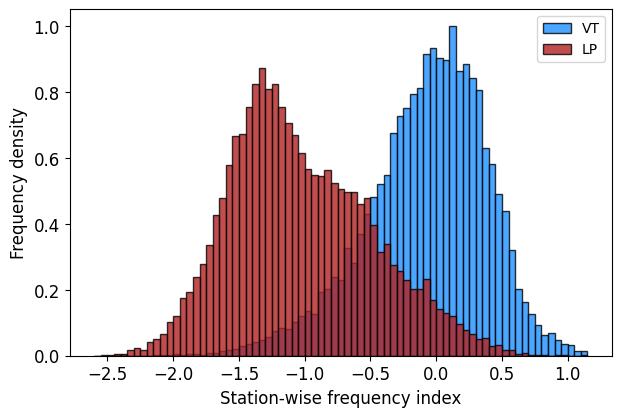

In [13]:
print(f"max {np.max(trace_freq_indices)}")
print(f"min {np.min(trace_freq_indices)}")
fts = 12
fig = plt.figure(figsize=(7, 4.5))

bins = np.arange(-2.6, 1.2, 0.05)
# plt.hist(trace_freq_indices,bins,density=True, stacked=True, color="white", edgecolor="black",label="Total")
plt.hist(trace_freq_indices_rg, bins, density=True,  edgecolor="black", color="dodgerblue", alpha=0.8, label="VT")
plt.hist(trace_freq_indices_lp, bins, density=True,  edgecolor="black", color="firebrick", alpha=0.8, label="LP")
plt.gca().tick_params(labelsize=fts)
plt.legend()
plt.xlabel("Station-wise frequency index", fontsize=fts)
plt.ylabel("Frequency density", fontsize=fts)
# plt.savefig(root_save_path/"FI_by_traces.jpg", bbox_inches="tight", dpi=600)
# plt.savefig(root_save_path/"FI_by_traces.eps", bbox_inches="tight", dpi=600)

max 1.3477482530379676
min -2.448048345595826


Text(0, 0.5, 'Frequency density')

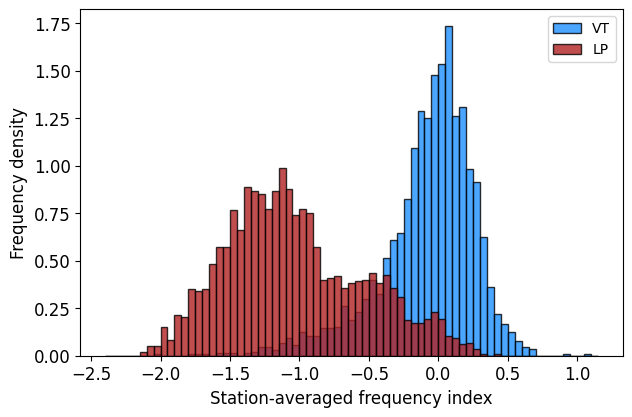

In [12]:
print(f"max {np.max(freq_indices)}")
print(f"min {np.min(freq_indices)}")
fts = 12
fig = plt.figure(figsize=(7, 4.5))

bins = np.arange(-2.4, 1.2, 0.05)
# plt.hist(freq_indices,bins,density=True, color="white", edgecolor="black",label="Total")
plt.hist(freq_indices_rg, bins,density=True, color="dodgerblue", edgecolor="black", alpha=0.8, label="VT")
plt.hist(freq_indices_lp, bins,density=True, color="firebrick", edgecolor="black", alpha=0.8, label="LP")

plt.gca().tick_params(labelsize=fts)
plt.legend()
plt.xlabel("Station-averaged frequency index", fontsize=fts)
plt.ylabel("Frequency density", fontsize=fts)
# plt.savefig(root_save_path/"FI_averaged_over_stations.jpg", bbox_inches="tight", dpi=600)
# plt.savefig(root_save_path/"FI_averaged_over_stations.eps", bbox_inches="tight", dpi=600)

In [94]:
len(rand_rg_events_table)

77574

In [88]:
print(len(lp_ids))
print(len(rg_ids))

2362
239292


In [85]:
print(len(metadata[metadata["source_type"]=="lp"]))
print(len(metadata[metadata["source_type"]!="lp"]))

17694
1583632


In [ ]:
print(len(metadata[metadata["source_type"]=="lp"]))
print(len(metadata[metadata["source_type"]!="lp"]))

In [74]:
len_both_P_and_S=len(whole_catalog2[pd.notna(whole_catalog2["trace_p_arrival_time"])&pd.notna(whole_catalog2["trace_s_arrival_time"])&pd.notna(whole_catalog2["trace_p_max_weight"])&pd.notna(whole_catalog2["trace_s_max_weight"])])
len_both_P_and_S_rg=len(whole_catalog2[pd.notna(whole_catalog2["trace_p_arrival_time"])&pd.notna(whole_catalog2["trace_s_arrival_time"])&pd.notna(whole_catalog2["trace_p_max_weight"])&pd.notna(whole_catalog2["trace_s_max_weight"])&(whole_catalog2["source_type"]!="lp")])
len_both_P_and_S_lp=len(whole_catalog2[pd.notna(whole_catalog2["trace_p_arrival_time"])&pd.notna(whole_catalog2["trace_s_arrival_time"])&pd.notna(whole_catalog2["trace_p_max_weight"])&pd.notna(whole_catalog2["trace_s_max_weight"])&(whole_catalog2["source_type"]=="lp")])
print(f"{len_both_P_and_S} waveforms have both P and S arrivals with nonzero weights")
print(f"including {len_both_P_and_S_rg} regular earthquake waveforms")
print(f"and {len_both_P_and_S_lp} long-period earthquake waveforms")

1601326 waveforms have both P and S arrivals with nonzero weights
including 1583632 regular earthquake waveforms
and 17694 long-period earthquake waveforms


In [50]:
whole_catalog2

,source_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_type,source_type,station_network_code,station_code,station_location_code,trace_channel,trace_p_arrival_time,trace_s_arrival_time,trace_p_max_weight,trace_s_max_weight,trace_p_first_motion
0,hawaii260294981,2012-01-01T02:06:21.510000Z,19.048833,-155.365500,43.04,1.92,md,le,HV,ALEP,--,EH,NaN,NaN,NaN,NaN,NaN
1,hawaii260294981,2012-01-01T02:06:21.510000Z,19.048833,-155.365500,43.04,1.92,md,le,HV,CPKD,--,EH,2012-01-01T02:06:29.480000Z,NaN,0.92,NaN,NaN
2,hawaii260294981,2012-01-01T02:06:21.510000Z,19.048833,-155.365500,43.04,1.92,md,le,HV,DAND,--,EH,2012-01-01T02:06:30.740000Z,NaN,0.07,NaN,NaN
3,hawaii260294981,2012-01-01T02:06:21.510000Z,19.048833,-155.365500,43.04,1.92,md,le,HV,DESD,--,EH,2012-01-01T02:06:28.950000Z,2012-01-01T02:06:34.520000Z,1.37,0.92,U
4,hawaii260294981,2012-01-01T02:06:21.510000Z,19.048833,-155.365500,43.04,1.92,md,le,HV,HLPD,--,HH,2012-01-01T02:06:29.180000Z,NaN,0.92,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6308976,hawaii272735962,2021-09-30T23:58:06.980000Z,19.198667,-155.485667,31.72,0.00,NaN,le,HV,RCOD,--,EH,2021-09-30T23:58:13.340000Z,NaN,0.92,NaN,D
6308977,hawaii272735962,2021-09-30T23:58:06.980000Z,19.198667,-155.485667,31.72,0.00,NaN,le,HV,SWRD,--,EH,2021-09-30T23:58:13.670000Z,NaN,1.23,NaN,U
6308978,hawaii272735962,2021-09-30T23:58:06.980000Z,19.198667,-155.485667,31.72,0.00,NaN,le,HV,TOUO,--,HH,2021-09-30T23:58:14.750000Z,NaN,0.92,NaN,D
6308979,hawaii272735962,2021-09-30T23:58:06.980000Z,19.198667,-155.485667,31.72,0.00,NaN,le,HV,TRAD,--,EH,2021-09-30T23:58:13.570000Z,NaN,1.23,NaN,D


# 以下是随便测试代码

In [ ]:
st

In [ ]:
st0=st.select(station="AIN")
st0

In [ ]:
len(st)

In [ ]:
client=Client("IRIS")

In [58]:
pt=UTCDateTime("2020-01-22T19:34:27.880000Z")
st=client.get_waveforms(network="HV",station="HUAD",location="--",channel="HH*",starttime=pt-10,endtime=pt+10)

In [59]:
st[0].stats

               network: HV
               station: HUAD
              location: 
               channel: HHE
             starttime: 2020-01-22T19:34:17.880000Z
               endtime: 2020-01-22T19:34:37.880000Z
         sampling_rate: 100.0
                 delta: 0.01
                  npts: 2001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 7, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 9728})
            processing: ['ObsPy 1.4.0: trim(endtime=UTCDateTime(2020, 1, 22, 19, 34, 37, 880000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 1, 22, 19, 34, 17, 880000))']

In [60]:
st[0].stats.mseed['test']="test"

In [61]:
st[0].stats

               network: HV
               station: HUAD
              location: 
               channel: HHE
             starttime: 2020-01-22T19:34:17.880000Z
               endtime: 2020-01-22T19:34:37.880000Z
         sampling_rate: 100.0
                 delta: 0.01
                  npts: 2001
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 7, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 9728, 'test': 'test'})
            processing: ['ObsPy 1.4.0: trim(endtime=UTCDateTime(2020, 1, 22, 19, 34, 37, 880000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 1, 22, 19, 34, 17, 880000))']

In [62]:
st[0].stats.mseed['test']="test"
st[0].write("test.mseed")


In [63]:
st2 = read("test.mseed")

In [65]:
st2[0].stats

         network: HV
         station: HUAD
        location: 
         channel: HHE
       starttime: 2020-01-22T19:34:17.880000Z
         endtime: 2020-01-22T19:34:37.880000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 2001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'M', 'number_of_records': 6, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 3072})

In [57]:
st[0].stats.mseed

AttribDict({'dataquality': 'M', 'number_of_records': 6, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 3072})

In [ ]:
pt=UTCDateTime("2011-12-31T10:20:56.580000Z")
st=client.get_waveforms(network="HV",station="DESD",location="--",channel="EH*",starttime=pt-5,endtime=pt+5)


In [ ]:
st.plot();

In [ ]:
st.detrend()

In [ ]:
st.plot()